# More on Numeric Vectors: Transforming Tweets
>  This chapter continues the process of understanding product reviews. We will cover additional complexities, especially when working with sentiment analysis data from social media platforms such as Twitter. We will also learn other ways to obtain numeric features from the text.

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Datacamp]
- image: images/datacamp/___

> Note: This is a summary of the course's chapter 3 exercises "Sentiment Analysis in Python" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/natural-language-processing-in-python)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 8)

## Stop words

### Word cloud of tweets

<div class=""><p>Your task in this exercise is to plot a word cloud using a sample of Twitter data, expressing customers' sentiments about airlines. A string <code>text_tweet</code> has been created for you and it contains the messages of a 1000 customers shared on Twitter. </p>
<p>In the first step, your are asked to build the word cloud without removing the stop words, and in the second step to build the same cloud after you have removed the stop words. </p>
<p>Feel free to familiarize yourself with the <code>text_tweet</code> list.</p></div>

In [3]:
text_tweet = '@SouthwestAir Another great flight &amp; crew, Las Vegas-Chicago #3397. Thanks! @USAirways thanks. @SouthwestAir got it squared away. Thank you. I had a man on the inside help me out! @JetBlue Not trying to make you look bad, on your website it says: "Due to weather in the Charleston, NC" Its actually in SC, not NC @USAirways thanks for giving away my seat. Another fine job! http://t.co/r7ibqr4CYd @USAirways your pple did a great job w the madness however some of your systems need help. I appreciate the hard work &amp; the push to b better @SouthwestAir I got a flight at 11:55am on Thursday but looking for something tomorrow, anything available? @SouthwestAir thanks I think we\'ve got it figured out @SouthwestAir Thanks for the response. Was able to get my situation resolved. Not a fan of Mother Nature today. :) @USAirways @AmericanAir First Class all the way!!💺✈️ Headed to @portlandjetport http://t.co/kDMq0jps02 @SouthwestAir - just talking to customer service @united makes me appreciate you even more!  They could learn so much from you! @SouthwestAir Thank you so much for stepping up your game and making my day after night of elevator music. Much appreciated. @JetBlue Btw, thanks for responding quickly!! @SouthwestAir Sent. Thanks VP! @USAirways ok thank you we were told ground delay due to snow. @JetBlue Gotcha... thanks for the update. I\'m ready to go whenever you are :) Enjoy your evening. @USAirways Will do. I appreciate the response. @SouthwestAir Awwweesssooomee! @SouthwestAir Black History Commercial is really sweet. Well done. @SouthwestAir though I work for another major airline,  I LOVE your Black history month commercial. I Thank you. @SouthwestAir Hi! I just saw a Black History month commercial on TV &amp; Im excited! In support of this month,will you all grant me 1 free trip @SouthwestAir thanks for the drink tickets hook up! Can\'t wait for my first international flight with you to NAS! #pumped @SouthwestAir Yeah, we figured it out.  Thanks. @SouthwestAir On my flight today from RSW to GRR I was able to snag a free SW Agent to check for me. It looks like we are (finally) all set. @USAirways  thank you! Glad to be heading home! Great people at your call center! @USAirways thx 4 replying. After trying 2 get thru many times, &amp; v-mail or people hanging up on, us we talked 2 tech...cont\'d @USAirways HA!  You\'re fun. @SouthwestAir Hey yea I got thru...everything is good now (well, in 7-10 days when the voucher goes through)  Appreciate it! @USAirways flying high thanks! @SouthwestAir thanks for your assistance..you guys ROCK!!💯 @SouthwestAir all good now. Going to make it to Boston on time. I\'m actually on your wifi right now @USAirways Thanks. It would be better from the gate agent at C14 in Charlotte boarding flight 1791. @SouthwestAir Glad it was finally resolved too. Too bad I can\'t get a free voucher to go with mine so I can have a friend travel next time! @JetBlue I would prefer a similar picture but full of E190 tails, but great shot! @USAirways thanks @SouthwestAir much respect! @SouthwestAir Thank you!  #thankful #feelingtheluv @SouthwestAir I got it added thank you! :) @SouthwestAir Great, thank you. Best of luck dealing with this horrible winter. @southwestair #fattuesday Great job celebrating #mardigras today at Atlanta Airport. Another reason I\'m nuts for you! http://t.co/8WBzOrRn3C @SouthwestAir No worries at all!!! I would rather be safe on the ground than take any chances. Yes! Tomorrow AM if BNA reopens ☺️ @JetBlue Well, thankfully they\'ve got a nice food court here...When will an update be posted? @usairways Thanks to Kevin and team at F38ish at PHL for some great service recovery tonight. Appreciate it. @SouthwestAir About time...and just in time for my next flight Thursday. @SouthwestAir Thank you. I know ya\'ll can\'t control the weather. I appreciate ya\'ll working to get my flight rebooked the last two days. @SouthwestAir Thanks. I\'ll keep checking. I\'m trying to book our first Disney World vacation. @USAirways Marsha M. at Myrtle Beach is the greatest! She deserves all the respect and praise there is! #ThankYouForEverything @USAirways thanks to Betty working gate at ILM and lovely gate agents here in CLT helping me get home 2 Phx tonight instead of tomorrow @SouthwestAir El Paso deals....May❤❤❤😍🌏 @SouthwestAir really appreciate the follow up, I always fly with y\'all for a reason! @SouthwestAir Awesome - thanks! Despite Mother Nature\'s best efforts, @SouthwestAir\'s good-humored folks got us home safely in an area heavily affected by winter storms. @SouthwestAir I did. Thank you. @SouthwestAir Thanks for taking care of me Today!  Michele rocked the customer service! Gate 25 HOU @USAirways thanks for your help! I left a message for DCA lost and found. Fingers crossed we find it! @JetBlue Worked now, ty @SouthwestAir thank you :-) @SouthwestAir All pieces were found and safely delivered to our home this afternoon. @SouthwestAir no worries. You\'re doing the best u can. Already Cancelled Flighted my biz trip. Still $LUV you! -RR 1079871763 @USAirways @AmericanAir @SVLLINDIA provides you the best logistics experience for people all over India.\n#Mumbai #Surat #NaviMumbai @SouthwestAir no worries. We got thru eventually. I was just curious. Best of luck to you dealing with the weather! @JetBlue wouldn\'t mind paying for the snacks but no $ for tix :-) Great job guys! @JetBlue Thanks for the quick reply! Just wanted to make sure it wasn\'t just my account :) @JetBlue I did see that! Working on picking up a trip or two as we type. @JetBlue what are the chances of actually flying out of Charleston today?? Cold, rainy weather in the south of all places... @USAirways she also appreciated having her very own hashtag! :) #lucycat @JetBlue awesome, thanks! on hold now. @JetBlue flight 117. proud to fly Jet Blue! @JetBlue thanks great recap. I wouldn\'t have been able to sleep!  I was nervous the bad guy was getting away. 😉 @JetBlue great. .@USAirways thanks! “@JetBlue: @jannasaurusrex Thanks for the kind words, Janna! #WeAppreciateYou #TrueBlue” and now I\'M feeling like a boss #jetbluefame @JetBlue boarding the back of the airplane first. Like a boss. #sosmart #jetblue #frequentflyerappreciates #alsoyayforsnacks @JetBlue sooo earlier i said i couldnt fly with you for my school trip but now i can! 😏 @USAirways Thank you, busy times. @JetBlue thank you for the information. @JetBlue why are you always so amazing! #jetblue #trueblue http://t.co/iIMTJxcvLG @USAirways thanks :) @JetBlue Thanks. I\'m finding lower fares already on other carriers with direct flights. July 8 - 13. @JetBlue incredible PR team. 👏👏👏👏 @JetBlue Was nice to see your Veterans Advantage Program at the gate on Sunday @ MCO.Keep up the good work at  JetBlue @JetBlue sounds great! Thank you!! :) @eatgregeat WOW~Thx for thinking of us, Greg! Heard #SOBEWFF was amazing! We\'ve heard the same about @JetBlue (ps thx for the info) #TeamNKH @JetBlue it will be glowing. Your crew and your aircraft sparkled. You guys know about @nokidhungry right? Might be a good partnership:) @JetBlue you all are the best #flyfi # ondemand #leatherseats #hipunis #legroom @JetBlue Longing to look into the blue eyes. #firstlove @JetBlue you don\'t need to cut services, charge more and give a better flying experience. That\'s why I use jet blue in the first place @JetBlue glad you like it. Feel free to steal it. @JetBlue your blue helped bring out the color of my eyes. And I promise I didn\'t eat all the free snacks. “@JetBlue: @Ruth_Slobodin Why not? We\'d sure love to see you, Ruth! #JustDoIt #YouKnowYouWantTo ;)” you know me too well 💘 @JetBlue great will do once I land in JFK @USAirways thanks for reaching out to me.  My Gold Div no. 2k424j0. My Flights were changed under Confirmation # DNX58V. @JetBlue here you go... Your napkins pretty much say it all! http://t.co/OxY1Jnpjm3 @USAirways yes and our flight attendant (who is wonderful btw) secured the tray table so it\'s not flailing about. http://t.co/JhXWMuTx4G @JetBlue A320 pulling into the gate as the sunrises here at @BostonLogan this morning #jetbluesofly #jetblue #airbus http://t.co/JGdu5us8Dz @USAirways thanks for seating me next to 2 hot athletes. This flight is significantly better now! @USAirways Thank you!!! On our way to get her bag now - thanks to having that number 😊 @JetBlue Thx for the quick response .... yep I tried- but it can\'t find the flight when I Input the Confirmation # @USAirways YOU ARE THE BEST!!! FOLLOW ME PLEASE;)🙏🙏🙏✌️✌️✌️🙏🙏🙏 @JetBlue Wish Everyone felt like you @JetBlue thanks to you customers like me stay loyal. From check in to landing. @SouthwestAir thanks!! We will see what happens!! @JetBlue haha. TY. Do you know what time that lane opens at Logan? @USAirways YOU ARE AMAZING!!! FOLLOW ME BACK, PLEASE!!!🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏 @JetBlue I like " Follow @JetBlue " @SouthwestAir Karen with customer service was very helpful. Thank you for providing one bright spot in a frustrating situation. @SouthwestAir you guys are awesome... #dontchangeathing #luv @SouthwestAir Finally! Integration w/ passbook is a great Valentine gift - better then chocoLate Flight. You do heart me. @SouthwestAir about time! Thank you! @SouthwestAir is having a sale! I\'m delighted! @USAirways You all work hard at making sure things flow smoothly. Keeping positive. @USAirways we are boarding now but have yet to depart.  Thanks for the response. @USAirways I totally understand the weather. Just frustrated. Thanks! @SouthwestAir LUV Ya Too!!!!  I will sing a song for y\'all when I finally get on that plane back to Nashville!!! #LOVESOUTHWESTAIR @SouthwestAir Thanks a ton! @SouthwestAir thank you, someone finally answered and was able to change my flight that was Cancelled Flighted bc of ice. Thank you for response @USAirways Thx to gate agt John Pascucci for finding us a flight from CLT to PVD after our original one was Cancelled Flightled http://t.co/YiwLhQhZgp @SouthwestAir always when I fly SW. #loyalRRmember @USAirways YOU ARE THE BEST!!! FOLLOW ME PLEASE;)🙏🙏🙏✌️✌️✌️🙏🙏🙏 @USAirways surprisingly quick response time by you and them. Thanks! @SouthwestAir yes. Thank you. Oct 25-oct 31 @USAirways still not in the air for deicing of plane. I\'ll miss connect but customer service was helpful.I\'m hoping to catch the next flight @JetBlue FYI, I\'m onboard #616 comfortably travelling to JFK, seat was no problem as you said. Thanks for making flying more civilized! @SouthwestAir and thanks! @SouthwestAir its all good. flight eventually took off, and landed safely. oh, and I got the free cup o wine. thx @JetBlue Yesterday on my way from EWR to FLL just after take-off. :)\n#wheelsup #JetBlueSoFly http://t.co/9xkiy0Kq2j @SouthwestAir nice work on the update! @SouthwestAir thanks do yall expect to be operational tomorrow out of Nashville? @JetBlue sure is 💙 @USAirways thanks so much! @SouthwestAir Beautiful, thanks a ton! @JetBlue after my second call to customer service and the fifth person I talked to, an amazing rep fixed it in about 5 mins! :) #persistence @JetBlue thanks so much! @USAirways thanks!  Can you help remind the agents it\'s ok?  Ps. Heard rumors of a streaming wifi TV/movie service you might be installing @SouthwestAir finally! @USAirways YOU ARE THE BEST!!! FOLLOW ME PLEASE;)🙏🙏🙏✌️✌️✌️🙏🙏🙏 @SouthwestAir  Thank you. @JetBlue That makes two of us! Lol #Blushing @JetBlue Happy Anniversary!! It\'s hard to believe you\'re 15!! You\'re so young! @JetBlue #1680 Super smooth flight and landing. Nicely done. @SouthwestAir Great job!! Looking forward to my next trip being able to use this new feature! @SouthwestAir Great job with the Passbook integration! It’ll really help streamline the commute to San Fran! 😊☕📲✈ .@SouthwestAir you\'ve got a mess here at DTW but your staff is doing great. @SouthwestAir + @twitter  = outstanding customer service!  Thank you! @SouthwestAir aww thanks!! Other than that, love it! @SouthwestAir thank you for your help resolving my problem Shannon ROCKS - even though Rhonda didn\'t !! @SouthwestAir can\'t wait! Thanks for the response!❤️ @SouthwestAir - I just had a great experience with your customer service team. Thank you! #LuvSW A-list @SouthwestAir @ PIT- Gate A1! Big shout out to the lady trying to track him down! @SouthwestAir luckily, the people working the BSO at Chicago Midway have been very attentive and found our bags in Punta Cana. @SouthwestAir awesome. thank you! @USAirways thanks @USAirways - done :) @USAirways thank you. We filled out a claim and hope to have the bags tomorrow. @SouthwestAir @Imaginedragons @beatsmusic well timed tweet, just boarded and will be listening on my way home! @SouthwestAir that\'s why I fly y\'all, that personalized service @SouthwestAir @Imaginedragons @beatsmusic I\'d love to hear them live at @VelourLive @velourlive this saturday! #destinationdragons @USAirways Will do :) @SouthwestAir So far so good! http://t.co/16c9ex79Rk @USAirways please give Tara G a pat on the back and praise.  She was very very helpful.  She is at PHL member lounge @USAirways  thanks I hope I get to my destination @SouthwestAir thx - fingers crossed they are found. Lmfaooo “@JetBlue: Our fleet\'s on fleek. http://t.co/1G9RnmYUQe” @USAirways thanks for the reply, hoping everything is cleared up in Charlotte by Monday @USAirways will do. Hoping for a voucher for a future flight #Optimistic @SouthwestAir Whoa. Thanks and that\'s what I wanted to hear! Early flight coming up. Thanks for the reply. @SouthwestAir is there a way to know who checked my bag on the curb? She was awesome!!! And want to be sure she gets a high five! @SouthwestAir thank you for handling this for me. Glad Southwest cares about what it\'s flyers think! @SouthwestAir :arrived in San Juan early. Thanks for a great flight. LUV u! @SouthwestAir thanks for the follow up.  I appreciate it. @JetBlue lolol @s_myc88 @JetBlue shows us their sense of humor with these tongue-in-cheek flight etiquette videos: http://t.co/GGuAA1JvDF @SouthwestAir @karajusto OK we will! Thank you!!! @usairways #crew keeping safety top of mind in CLT. http://t.co/a0YoSJHZMc @JetBlue true. Maybe. Wish I had expedited security haha @SouthwestAir @taylormdowns We share that value in common. :) @SouthwestAir JUST GAVE ME TICKETS TO SEE @Imaginedragons  AT @VelourLive ON SATURDAY. I CAN\'T EVEN RIGHT NOW HAHA. THANK YOU!!!! @SouthwestAir once or twice a year. Hard to get vacation time from work sometimes. But love flying with you guys! @SouthwestAir @love_dragonss lol I\'m sorry I\'m just seeing this now but LAUREN OH MY GOD AHHHH Why “@JetBlue: Our fleet\'s on fleek. http://t.co/a7NvbJ8ipx” @SouthwestAir amazing service by your SW stewardesses! From den to Cun and from CUN to Atl and atl to lax. Thank u! @SouthwestAir thanks for the follow up. So glad to get my bag back. @SouthwestAir love..luv the addition of the passbook option. Power Moves RT @JetBlue: Our fleet\'s on fleek. http://t.co/t9s68korSN Bingo! “@SouthwestAir: Thank you for bringing this to our attention. We\'ll be happy to reach out to Noah so we can make this right. ^MR” @USAirways captain on flight 1712 from PHX-PHL at 3:55 tonight was hilarious. "Greetings from the pointy end of the airplane" haha thanks! @SouthwestAir just had a great flight #4223 with Damion! He was the best #damionflight4223 @SouthwestAir woohoo that just made my day. I looked and just couldn\'t find that, thank you! @SouthwestAir One heck of an airline http://t.co/CyoOnZfTdC @AmericanAir I might look into that. My wife travels much more than I do. Could we both use the membership? @AmericanAir Great, thanks. Followed. @AmericanAir This is exactly why ill be flying AA from @Dulles_Airport to Dallas! Only airline I trust! @AmericanAir got another flight. Thanks you @SouthwestAir y\'all the real MVP with these prices... @SouthwestAir Thx Ops Agt Rich Westagard n Flight Att. Nancy @ DEN Airport.Held flight 1027 n even saved seat 4 Bus Select #CustomersFirst! @SouthwestAir Thank you for having flights going out of Nashville! You guys Rock! #DisneyPrincessHalfMarathon #girlsweekend #bffs @AmericanAir I don\'t think you should help him at all based on his behavior. The voucher and cot seem like enough lol 😃 @SouthwestAir DM sent! Thanks so much for responding! Your response was so timely, I missed it! @AmericanAir got back eventually! Was a rollercoaster. Once I got to the airport &amp; got to speak to someone things got fixed very quick. @SouthwestAir I love you guys! Had to take a few other airlines this week...makes me love and appreciate y\'all so much more! #onlywaytofly Lovely! RT @JetBlue: Our fleet’s on fleek. http://t.co/Hi6Fl1AX9E I appreciate the reply. RT @SouthwestAir: @luxclark We’re so sorry to keep you waiting, Laura. An Agent will be with you shortly...^CB @AmericanAir yes yes yes,so glad to be headed home! @AmericanAir thanks!! @AmericanAir thanks keep me updated just hope I make either of my connections to Killeen Tx @SouthwestAir the new logo is going to look amazing on the airplanes “@JetBlue: Our fleet\'s on fleek. http://t.co/3kVkd8yRxa” + lol wow @SouthwestAir love bridesmaid dancing Can\'t wait for you to fly into puerto Vallarta and kick united ass! @AmericanAir thanks @SouthwestAir I ❤️ you! The only airline that understands us military families and our unpredictable changes. Pound it 👊 "LOL you guys are so on it" - me, had this been 4 months ago...“@JetBlue: Our fleet\'s on fleek. http://t.co/LYcARlTFHl” @JetBlue wow, keeping up with the times... @SouthwestAir filing it now. Thank you for your response. @SouthwestAir thanks so much for making my night 😀 cannot wait for my trip next week! http://t.co/NbZ45jCd1r @SouthwestAir thank u for not leaving me \n@me nice job running thru the airport to catch your connecting flight @southwestair thanks for taking it up a notch!! leinenkugels #craftbeer #goodflight @ Norfolk… http://t.co/TgSLjjN6g0 @SouthwestAir Thanks for replying, I sen\'t my conf #! I love aviation and Southwest and all I wanted for my 18th was to fly SWA for the day! @SouthwestAir, I really appreciate you all\'s #BHM commercial that aired today during @BET\'s #BookofNegroes @USAirways — I had exceptional service on flight #403 from IND to PHX!! @AmericanAir Believe me, I understand. Flight #2955. Was originally booked for Sunday. Flight was Cancelled Flighted and rescheduled for today. @SouthwestAir you guys are so clever 😃 http://t.co/qn5odUGFqK @SouthwestAir - Great flight from Phoenix to Dallas tonight!Great service and ON TIME! Makes @timieyancey very happy! http://t.co/TkVCMhbPim @SouthwestAir Fantastic! Thank you! I always look forward to JB RT @JetBlue: @bostongarden :) Looking forward to welcoming you onboard! 💙 Looking forward to using Passbook when I fly  @SouthwestAir in a few weeks! @AmericanAir thank you! @JetBlue toss this ticket...it\'s great PR and I\'m sure every college student following me will be willing to rock out wit too 👀👀 @SouthwestAir can i get tiks for #DestinationDragons omg id love to! Plz 😱❤️im dying @southwestair Amazing view on the approach to LAX tonight. http://t.co/a68d5fULmH @SouthwestAir thanks, already subscribe and have a RR Account. Had received a promo code last month but has since expired. Any new offers? @SouthwestAir thank you kindly. @USAirways Fabulous - thank you so much! Looking forward to taking to the skies with you! :) @SouthwestAir THANK YOU for finally making your boarding passes work with passbook @USAirways thanks! @SouthwestAir de-icing is important! @JetBlue Thanks so much for talking to me! The article about #Twitter chats came out great! http://t.co/rKorHvR9z1 #contentmarketing @USAirways YOU ARE THE BEST AIRWAYS! Follow me please!!!!!🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏 @SouthwestAir for the win as always- saved my day and got me on a direct to Orlando. 🎉🎉🎉 @SouthwestAir just did last night. Thanks for following up. :) @SouthwestAir thanks for getting me back to Nashville. Big thanks to the pilots on the 6:15 out of Baltimore. Flying in snow landing on ice. @USAirways YOU ARE AMAZING!!! YOU ARE THE BEST!!! FOLLOW ME PLEASE AND I FOLLOW YOU BACK;)🙏🙏🙏✌️😉) @SouthwestAir Oh no worries NL, no disappointments here. Better to have NO lounges than like #Delta who has them but does disappoint! @SouthwestAir @DeltaPoints hey at least you guys are honest with your customers unlike @Delta @SouthwestAir Thanks for the info! Have a good day. @USAirways Sending thanks to employee Freddie in PHL Admiral Club A East for allowing me to give a day pass to my sibling stuck there today. @SouthwestAir Landed in Nashville! Thanks for taking care of us! http://t.co/RYXbPLgMnK @SouthwestAir Thank you for your time! @SouthwestAir Thank you! @USAirways that\'s why u guys are my #1 choice. @USAirways YOU ARE AMAZING!!! YOU ARE THE BEST!!! FOLLOW ME PLEASE 🙏🙏🙏😢😢😢🙏🙏🙏 @USAirways Thank you. And thanks for being so accommodating. @JetBlue: So excited to hear about your move towards international travel from Long Beach Airport! @SouthwestAir I love and appreciate the fact that you guys rarely Cancelled Flight flights and are on time, but I need a Cancelled Flightlation this time. 🙏 @SouthwestAir thanks for your excellent response time and assistance! All set :) @SouthwestAir - total win!! Happy 7th bday on intercom, chocoLate Flight kisses, and a chance to hand out snacks.Thank you. http://t.co/NKloZcNtto @SouthwestAir big thanks to your team. family emerg, same day ticket, experience was excellent. 1st time flying with yall, not my last! @SouthwestAir has the best customer service! @USAirways with the weather mess in the South, I missed my connection in CLT. Impressed though with the Cust Serv phone reps today. @southwestair Flight 4146 Phi to Den was staffed by a great crew. #freecomedyshow #newlifetimecustomer So relieved I\'m flying @JetBlue after listening to everyone at the neighboring gate bitch about Spirit. My airline\'s better than yours. “@JetBlue: Our fleet\'s on fleek. http://t.co/g12sn5qsqZ”- no... Yall better than this @USAirways thanks. 😒 @SouthwestAir hot stewardess flipped me off @USAirways Frustrating days!No flights home, changed airlines. Thank you PHL USAirway employees &amp; @united for help getting me back to IAH. @SouthwestAir Once again, I was able to change my flight without any fees... oh and the two free checked bags.  Best airline ever. @SouthwestAir you are the #Official airlines of #DivadaPouch aka #ThePoopQueen http://t.co/XXY2d2iMnP @SouthwestAir @JohnWayneAir Thank you both very much!! @USAirways Flight # 604. Thanks. @JetBlue We had 2 great flights into and out of the Bahamas, even during the bad weather in the northeast, thanks for the great service!!! @SouthwestAir neveind, it\'s been found and on its way. Thanks for making the process so painless @USAirways YOU ARE THE BEST AIRWAYS!!!!!!!!!! FOLLOW ME BACK, PLEASE 🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏😢😢😢😢😢😢😢😢🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏 @SouthwestAir A wonderfully nice agent in Austin helped us out. Wish I remembered her name to give proper kudos. @SouthwestAir Got it covered. Thanks! @SouthwestAir Awesome!!! Sending now. @USAirways nice touch with using my first name.  Very intimate.  I\'ll be filing a claim soon to be reimbursed. Have a us airways day! @USAirways on Sunday! Can\'t wait! See you then @JetBlue loved the service from the staff at Newark today. \n\nGood service goes along way.\n\nI appreciate your preciation  \n\nNj ✈️Tampa \n\n🔵🔵🔵 @USAirways Thank you so much its been a very stressful day “@SouthwestAir: @kirkwoodtiger Hmmm... how does the Caribbean sound? https://t.co/AAY5avg99b ^LD” WARM THANKS! @USAirways landed safely everything worked out. @southwestair#SWADiversity We are ready to be inspired! http://t.co/S3EsW5AgUm @usairways 4 flights in 48hrs &amp; I\'ve had the same flight attendant for 3 of those flights. Freaky coincidence! Plus side she\'s great. :) @USAirways Absolutely!! The staff was amazing!! @USAirways Haha - that will indeed be a great day! @SouthwestAir allows you to change a flight once for no fee, yay! I will always book flights with them. @AmericanAir changes you $200 @SouthwestAir I\'m really craving your pretzels, please send me some. @SouthwestAir just added #passbook support to their iOS application! Finally, I get to add them to my collection. http://t.co/lEdNoCdQee @USAirways thank you! I tried that and they said they didn\'t have it. Anywhere else to try? @USAirways thank you for fixing my 5 hour delay. @USAirways customer service at its finest Don\'t show these to Larry Fedora. RT @JetBlue: Our fleet\'s on fleek. http://t.co/qqlzk2jkzR @southwestair Great job celebrating #MardiGras2015 .  You own the industry . Another reason I\'m nuts for you! http://t.co/8WBzOrRn3C @SouthwestAir - Apology accepted! #customerserviceWIN #itravelalot http://t.co/z5znfwkKWP @SouthwestAir LOVE your TV ad with the girl dancing. Makes me laugh every time, AND now I want to take a trip! :-) @SouthwestAir Yes! I did and the bags came straight to my hotel. Thank you ...you guys rock! @SouthwestAir thank you!!! @USAirways shout out to the pilots and FC attendant(Eliz) of US 673. Super strong crosswinds during landing. Eliz did a super job throughout @SouthwestAir pleasantly surprised to be boarding my flight on time this morning at @Fly_Nashville. Good job! @USAirways ice cream up front! Solid @SouthwestAir OH MY GOSH SERIOUSLY?! you just made my day, week, year!!! No one will appreciate this more than me!!! @USAirways after missing my flight and reFlight Booking Problems 2x, I just walked onto another flight and my phone was still on the seat!! @USAirways on time today and from PHL! Nice work! #ThereIsAFirstForEverything @USAirways thanks Travis at PHL A East checkin for knowing baggage policies. Skis &amp; boots count as 1. Teach your mgr who didn\'t know @USAirways finally rectified my flight situation! Thanks again @USAirways how about a drink voucher for the next flight?? #winkwink @SouthwestAir Thank you thank you thank you @SouthwestAir @love_dragonss oh my god LAUREN OH MY GOD OH MY GOD @SouthwestAir @love_dragonss holy fuckinf shit @SouthwestAir @love_dragonss LAUREN OMG BEST AIRLINE EVER @JetBlue you guys operate a world class company and for that I thank you @SouthwestAir you\'re the best @SouthwestAir @love_dragonss LAUREN OMG IM DEAD IM SO SO HAPPY FOR YOU YES YES @SouthwestAir @love_dragonss LAUREN IM SCREAMING @SouthwestAir @love_dragonss oh my gosh @USAirways right on. Up. Up &amp; away ✈️🌞 @JetBlue Thank you guys! Brilliant customer service @USAirways FA attendant on 4553 PHL to PWM tonight was fab!  An asset to your team.  From 1F. Have a great night team! @SouthwestAir had a great LA flight with Clarence and Frank! Those 2 guys are a hoot! 😜😂 thanks @AmericanAir thanks, I\'ll look forward to the response. @united New Apple crâpe, amazing! Live from UA1207. Really nice crew too.  #AmericanAir has biscuits, UA needs them 2 http://t.co/gZ9GqDT7Jj @JetBlue thanks for the info... Figured that was the case. Hopefully my new hashtag will change that ;) #ABCLetJetBlueStreamFeed @united Thank you for the new Club at O\'Hare. Very comfortable. You made the difficult weather days proficient and enjoyable. @AmericanAir thank you, truly appreciate the help, just sent a DM @JetBlue saved the day:) @Expedia lost a costumer #jetblue #makingthingseasy #feelbetter @united I appreciate the follow up. @united @jsumiyasu I am thankful to the  United ground staff who put me in the last seat on the last flight out. Home Late Flight is still home! @united no worries about the tweets. We all should do what we can to make sure we, as in your tag line, "Fly the Friendly Skies." @united @FlyANA_official pleasantly surprised to find ANA has made major upgrades on their transpacific route in flights, planes and service @AmericanAir Thank you so much. @JetBlue yes! Terra blue chips were my favorite. :) @JetBlue I DM\'d my confirmation code... Thanks again for your help! Mommy, daddy, and kids appreciate it! @united Brandi Zabsonre in Denver deserves a raise for bringing delight into a terrible travel situation. big ups http://t.co/TK3aOpdtSQ Cool! "@JetBlue: @hgeronemus We are 60% there and anticipate completing installation on all our A320\'s this year. http://t.co/sGckBopATA” @JetBlue Love you guys sooooooo much. Ridiculously appreciated! A+ service! @united thankful for great service in Newark. Seats fixed and I was seated with my daughter! Fab landing in Fort Myers! @AmericanAir #AATeam thanks for working in very rigorous weather conditions for all @JetBlue you are officially my favorite, thank you for the wonderful service at JFK @SouthwestAir thank you so much completely made things right! @JetBlue thanks!! @SouthwestAir round-trip tickets just arrived for our auction at the Post-Masters Invitational! Thanks Southwest! http://t.co/mRfBjtePef @SouthwestAir Thanks so much! @SouthwestAir  THANK YOU for your awesome flights. Sweetheart got screwed on @FlyFrontier, managed to scramble and get a SW plane today. !!! @JetBlue thanks! I\'ll do it. @JetBlue @FerrisSalameh Love JetBlue\'s speedy Twitter customer service. @SouthwestAir  I USED to always fly Southwest. @SouthwestAir weather bc of system outage. Hopefully everything goes smoothly now. Thank you for follow up @JetBlue thanks! @SouthwestAir I managed to get sorted out over the phone. Good luck dealing with the snow in Texas! @JetBlue thank you so much for your effort @AmericanAir Delaney and Shawn at DFW showed exceptional customer service today. Will happily choose AA whenever possible now! Thank you! @SouthwestAir never mind, I moved my flight to tomorrow. Thanks for the help! @JetBlue thanks for letting us know. Hoping for no more delays! @SouthwestAir  thanks Southwest for saving our trip. my sweetheart isn\'t going to miss seeing #AltonBrownLive thanks to y\'all! #SOhappy @USAirways thank you @AmericanAir thanks... I finally got through this afternoon.  :) @SouthwestAir thx. Make it right. Help Meagan Fouty Brancato fl#2771 dfw gate 4 preboard w/kids - b4 group A please. Please. @SouthwestAir love them! Always get the best deals! @United WiFi onboard 737-800 far superior in pricing and performance (user-perceived bandwidth and Late Flightncy) to recent @GoGo experiences. @JetBlue Airways Corporation (NASDAQ:JBLU) Reaches on New High Range ... - StreetWise Report http://t.co/C7tpdKqULM @united stay warm - I will be passing through Chicago next week @AmericanAir Well, you guys are totally kicking a million pounds of ass. Bar none, the best SM team in the airline industry in my opinion. @JetBlue Please come to Indianapolis! @united thank you! I wish the lady in Little Rock had told me that in the morning when I asked her @JetBlue okay thanks. Hope to be flying with you guys soon! @JetBlue he loved the #natural #beefjerky snacks😉 @JetBlue thanks for your reply. It was flight 1572. @JetBlue who is he I must send a note!!! Too good for words! @united You might be dealing with frustrated passenegers. hope you all have a great day :) thank you very much for an amazing airline :) @JetBlue - loving Capt Joe on our flight from BOS to SFO #633. This should be fun! @united JT thanks for your help I’ll complete the form once we are back home @AmericanAir thanks @JetBlue It was fabulous! Very pleased. @AmericanAir THANK YOU!!! 👍👍👍👍👍 @JetBlue u the real MVP http://t.co/jWL26G6lRw @JetBlue No worries. Time flew in the terminal and now we\'re taking off. Thanks again! @united Thanks! @united Elizabeth at Washington Dulles just hooked me up with a new connecting flight at my gate! I\'m super pleased! @united Thank you for the speedy response! I figured it may be something of that nature. You guys and your "fine print," haha @united holy high speed internet batman!  Speeds at United Club at IAD are insanely fast!  Thanks @AmericanAir Thank you!!!! I will be there to pick her up on time. @JetBlue - looking forward to it when we finally take off. @JetBlue thanks... @united doing a good thing, holding flight for a few for 11 peeps on Late Flight connecting flight. We\'ll still make destination on time @AmericanAir thank you for the assistance @united on a good note, the 2 employees I encountered @ Newark were fabulous. I was very Late Flight for my connecting flight and they got me on!!! @united Thanks, ^KP. Please also mention the Quiche breakfast and Tandoori chicken dinner entrees and accompaniments are truly First Class. @USAirways connection made. Thanks again this week. #daddyshome @united looks like I\'m settled in to where I\'m going.  Thx. Is expiring the @united offer to buy or transfer #United #MileagePlus miles with discount? Many offers during a year http://t.co/6tz6imqZlG @AmericanAir yes, it says it should be deliver within 6 hours after pick up line. @united took this picture on Thursday. #awesome http://t.co/IVGpZSjtkW @AmericanAir thanks. Delivery status?? @united Sure did! Only waited about 15min. Yay! @JetBlue thanks! @USAirways yes I did thank you! They did a great job turning the flight in jan ! @united thank you! 😊 @AmericanAir Hey Becky Piela at the Orange County airport has been really kind and helpful with rescheduling our flight! @united done just now, thanks. @united Thanks for the timely service &amp; great staff getting my wife and me to and from Cancun this past week for our honeymoon. @AmericanAir Chicago seen from seat 6A, AA 1620. So far a great ride! On to PDX! http://t.co/X4rsvAGIjN @SouthwestAir tv stream means I get to spend my flight watching 1999 and 2011 Women\'s World Cup Finals. #throwback #bestflightever @JetBlue thank you @SouthwestAir @heavenlychc9 I\'d at least enjoy a free cocktail...or two. @SouthwestAir beyond ready @SouthwestAir thanks for the great customer service today! 👍👌 @SouthwestAir happy to enter your sweepstakes again #nutsaboutsouthwest @JetBlue ok thank you for the quick response JetBlue still the best comp @JetBlue im in a session presented by one of your beloved travelers, @paulgordonbrown,I see why you love him so much http://t.co/vv8cFyhKVb @SouthwestAir thankyou :))❤️ @SouthwestAir crew on flight 206 is awesome! Tell them I sent this tweet and maybe they will give me free wifi... #canthurtasking @SouthwestAir Katie, Gate C47, Denver International, fantastic customer service helping me and 2 new flyers; thx for amazing staff! @JetBlue oh definitely. I kind of only fly JetBlue. @JetBlue thanks for getting me to Orlando early #happiness @SouthwestAir /I really love your customer service Lou Ann in Phx rocks. Thanks SW. #be Ourguest @SouthwestAir Thanks for two smooth, safe and fast flights! #Boston #Houston #LUVSWA http://t.co/elhxUV0Uj1 @SouthwestAir thanks! @SouthwestAir great day in the air. http://t.co/YNc2ZUt4zz @SouthwestAir in flight wifi + @TMobile wifi calling makes for the best combination. Who doesn\'t love texting 40,000 feet in the air :D @USAirways - Check-in staff at PHX are awesome! Great traffic control for general boarding. @SouthwestAir What an awesome flight Dallas 2 NY. Virgin America refused bc of my child\'s peanut allergy but u guys didn\'t. Thanks! 👍😊 @AmericanAir no kidding! Gonna take some beating on the apron... And there are some good lookin\' planes out there! @USAirways   Just talked to reservation. Must congratulation to them. Very friendly.  Good for usair. The ONLY airline we fly. @SouthwestAir is my favorite airlines. I\'ve never had issues with them. Plus there crew is entertaining. @SouthwestAir your flight attendants are really funny!! The sass is giving me life!!! 😂 @AmericanAir thanks for following up- it finally worked!! Fingers crossed the new flight works. @JetBlue Kudos to JetBlue social media team for jumping in an helping me out during the last snow storm while web site was down..Thanks!! @AmericanAir Was not on board you today just watched report unfold on Twitter but still am very proud! @JetBlue thanks so much for your condolences and quick response. It is very much appreciated @SouthwestAir thanks for the quick response. Should I call daily it wait the 5 days. @JetBlue Thank you Alicia!  #ExceptionalService @SouthwestAir thank you. Great customer service so far. Accidents happen I understand. Hopefully everything works out. @SouthwestAir 2/22-MDW 2 SAN flt 1687 attendant Melissa was awesome! Fast, smiling, great. After weather Cancelled Flight day b4, it was welcome @SouthwestAir The Fact That U See Black History Month 12 Months A Year Is Honorable! We WILL BE An Economic Base For Corp. Like U In Future! @SouthwestAir eyes next steps for improving #inflight #Wifi - Runway Girl http://t.co/h46HT1Oz40 @SouthwestAir Thank you Thank you Thank you!!! My last attempt to win #DestinationDragons tickets was a success! I could not be happier!! :) @SouthwestAir oh no worries. Just have never seen that before until today. I mean…it is a great card 😀 @JetBlue thanks. I chatted with a nice fella about it and he gave me the lowdown. @JetBlue mission accomplished: gave @paulgordonbrown  a hug http://t.co/LT1pYKfvRq @AmericanAir Thank you for the response, we got it resolved at the counter. @SouthwestAir thank you :) @SouthwestAir It\'s all good. Thanks! @SouthwestAir following. Thank you. @SouthwestAir Flight 1700. (PHX TO LAX) Wheels stop.  Glad to be home!  Thanks to the professionals both up front and in the cabin!!! @AmericanAir thank you. They are processing my refund. @SouthwestAir 👏👏👏 on that Late Flightst ad. Makes me happy to be flying you in a few days. #BETHonors @SouthwestAir I love this airline so much! Thanks so much! The service is great! The snacks are amazing! Everything is outstanding thanks!! @SouthwestAir @intuit @jhamilton2007 4 moms, 4 careers, 1 day trip to LA. #intuitlife #leanin http://t.co/2qJbCv5jzq" #southwestairlines @SouthwestAir ok thank you  i hope  so too @SouthwestAir Customer Centricity is knowing people #ANAMarketers @JetBlue ah no the staff was perfect this morning at JFK, more sleep for me!! :) @JetBlue @Airbus  Wow, awesome videos guys https://t.co/dbcvEPn5QC Great work. #Bluemanity #CoreValues  #Passion #AeroJobMarket #avgeek @JetBlue @Airbus Wow what an amazing video https://t.co/dbcvEPn5QC Great world Guys #Bluemanity #CoreValues #Passion #AeroJobMarket @JetBlue today my family gets to experience #mosaic status w/ me! #LifeIsGood @SouthwestAir strives to be \'Customer Centric\' in everything they do - communications, advertising, customer journey, etc. #ANAmarketers @SouthwestAir Thanks! Sent a DM to you. Let me know if oyu need any additional information. @JetBlue word thanks @USAirways Yes thank you. Appreciate u checking... @SouthwestAir Thx for your quick response and action! bf will make good use of the voucher #satisfied #happycustomer @JetBlue 162, SMF to JFK! @AmericanAir Flight for tomorrow was Cancelled Flightled. New one booked. Seats taken care of. Just a tweet to commend you all on the service. Thanks! @SouthwestAir "Airport snow removal method #22.."\nKeep up the good work folks, this is where Cessna\'s become 747\'s! http://t.co/7poFSXOjSY @JetBlue of course !!!! @SouthwestAir I agree! RT @9NEWS: One airline is the fly-away favorite at DIA  #9NEWSBusiness http://t.co/o3WlaInImY @USAirways I\'m enjoying my flights so far! You\'re doing a great job. Today\'s been tough, so thanks for making my flights comfortable. @JetBlue Thanks for the complimentary upgrade to first.  You are the best! @SouthwestAir is the best airline hands down. Amazing customer service, bags free and affordable flights. #happycamper @SouthwestAir thanks to Ella-Mae at LAS counter for going above and beyond to help us get back to ABQ after our flight was Cancelled Flightled! @AmericanAir Thanks to AA for the upgrade today and getting me on a new flight after my first one was Cancelled Flightled! @SouthwestAir Looking forward to flying once again with #SWA on Friday! The #LUV airline. #DTW #MDW #TUS @southwestair cool shot of the moon and one of your fleet http://t.co/kl9BAiMES6 @SouthwestAir loving the new planes and the lighting, only wish windows were larger. http://t.co/h44uJ63CJG @SouthwestAir can anyone help me upgrade to buisness select !? Cant seem to get hail of the right area at all .. I know you guys are good @SouthwestAir - We left iPad in a seat pocket.  Filed lost item report. Received it exactly 1 week Late Flightr.  Is that a record?  #unbelievable @USAirways Shavon at customer service desk in Charlotte was fantastic! So helpful and smiling evn after what sounds like long day.Reward her @AmericanAir first ride on new 737-800 with new interior and in seat video. Nice improvement! #Newplanesmell http://t.co/dJJjN9sLHT @SouthwestAir had a great flight to and from Cabo last week with my family #smoothflight #frequentflyer @AmericanAir No worries at all. Y’all have a good one!! @JetBlue Even though this flight #226 didn\'t have much needed hot beverages 4 us NY-ers, the landing was super smooth 👍👍 😊 #happytweet @SouthwestAir bumped me to preboard on both flights (because I\'m fat?) Whatever the reason, thanks! @SouthwestAir Thanks to your team for dealing with Flight 1700 to Houston. @SouthwestAir Thank you for the tip! @JetBlue thanks for getting me to Boston early for @TuftsEnergyConf "Breaking Barriers To a Clean Energy Future" @JetBlue Thanks! @SouthwestAir has the smoooothest flight attendants. #SouthwestSmoothie http://t.co/Vr9k180LaI @SouthwestAir Thank you for taking good care of people with ALS! http://t.co/m1yyWAFkFI @KevinSwan_ @ALSTDI @A_Life_Story_ @JetBlue got it. Thanks Thank U 😘 “@JetBlue: @ItsLaLoca But of course! Safety is always 1st!  We\'ll make sure to handle her with CARE and LOVE!  :)” @united thanks! :) @AmericanAir Thanks for asking On second plane after maintenance issue, for flight from ORD to LIT. Sitting at gate in very very warm plane That would be great! I never thought I\'d be the sort who\'d be into them, but it really makes the flying experience more bearable @JetBlue @united Will have to try standby in Denver tonight or will have to Cancelled Flight father son trip till next year. Thx for trying. @JetBlue thanks to the gent on the phone who fixed my BOS-MCO flight and the fee waiver! A320 now :) #flyfi ! I forget her name :( @united they are all -pilots, FA and ground personnel doing a great job. Weather is to blame... Who do I talk to about that :) .@AmericanAir @TyWinter it\'s really the small things--the details--that make an excellent experience or a really irritating one. @AmericanAir Thanks! Great stuff! I can only imagine how jammed everything is. @united hey awesome!  Thanks for the reply, will be filling the form out! @AmericanAir Thanks! Hope I don\'t look like a complainer, I\'ve written of good experiences w/you in the past and am making do in terminal 5 :) @JetBlue @united have reported it.  Still in Istanbul at the moment apparently.  On the other plane haha.  Hats off to the pilot! @united #1007 Houston-Bogota boarding again, safety first, it seems the mechanics fixed the problem faster, good energy to fly home/family @united Honestly, I stopped trying to report things via website. Now I just laugh. Flights work. Miles accrue. I\'m sure it\'s just cosmetic. @USAirways Got it, thanks! @united @parryaftab done thnx @JetBlue Success! Good work JetBlue team @JetBlue great flight! Great view! :-) http://t.co/Yxn00pnOav @JetBlue beautiful ride. Thanks again:) @AmericanAir Yay, thanks! Appreciate the help, I know it\'s NUTS right now with the cold and ice! @AmericanAir F-A-N-T-A-S-T-I-C!! thanks again for coming thru with great customer service! @united thanks for the re-upgrade to 1st class. It may be a 45 min flight, but it is appreciated. @united well, thanks for not charging me for switching my two Cancelled Flightled flights anyway. That was pretty nice. #stillmakingmepoorthough @united thank you! Love united!! Have 4 flights today! @united I am blown away by stellar #custserv !! Thank you &lt;3 http://t.co/JOrEScfb4x @united Boeing 777 Star Alliance short finals @Heathrowairport 27L on an amazing winters morning #777 #Avgeek http://t.co/owMaXOyEhZ @AmericanAir will award me 50,000 air miles!!! Yes I am going to take a vacation! \n#thanksamericanairlines @JetBlue gr8 #Mint crew on #flight 123 to #LAX they\'re #Mintalicious #TrueBlueLove #ShelleyandMarcRock #travel #air @USAirways Just spoke with a representative. Moved my flight earlier. Thank you so much for the follow up. @AmericanAir sure, thank you! @JetBlue Thanks for offering this service, guys! http://t.co/xDjzkC34GB @united all good! Next flight was a little delayed so it all worked 👍 @JetBlue what can I say, I\'m #LostinLove w/our #brandmance https://t.co/Bzwgp7aDVE #wemosaictogether #Mint #Love @united sweet, follow back and I\'ll get the dm off @united Thank you Margo at Houston\'s Bush Intercontinental for getting me home earlier. @united Thanks - it\'s very helpful to understand that the reduced price seats that are sold at check-in have priority over the certificates. @united thank you! @JetBlue you guys rock!! http://t.co/LA397zaoAY @united can I just go ahead and live in your premium cabins? I\'m in heaven now en route to LHR @united Fantastic job by your people today on ua22 from Dublin. A jam packed plane but the crew was wonderful!! @united Just did, thanks for checking! :) @united well it IS John Hughes\' birthday. But I will stick w the plane &amp; hold off on trains &amp; automobiles. Gate workers are doing well. @united thank you for getting our daughter home when @americanair Cancelled Flightled all their flights to Nashville @united great. Looking forward to your response to my DM then @united it\'s kinda funny. No worries. @united okay - thanks for your help, JT! I appreciate your time! @United is the best way to re-unite me with my one true love, shopping in USA\'s fashion capital #NewYork #unitedVUSA http://t.co/rBn7StUij1 @united thanks @united Okay, thank you for your help :) @JetBlue PDX to JFK was suuuuper HOT. @united I forgot that Intl flights out of LAX don\'t go from Intl Terminal! Easiest re-check in ever! woo! @AmericanAir thanks! a response is better than nothing at all {ahem, @USAirways} @AmericanAir those were snacks we left on purpose for your team. :) for being so helpful this morning at the desk and on the phone! @USAirways a big thanks to the gate agent flt5127..keeping us informed of the delay#greatcustomerservice @united yes, Thx! At 10:35 (landed at 9:20). @united flight to RSW tonight -me &amp;  twin 3 year olds. A pilot who was in row by me stayed to help me get the boys &amp; bags off. Lifesaver!! @united did I win :) @JetBlue Love you, bae. #JetBae @united please give special thanks to Aaron in Tampa office for helping me for literally two hours! He\'s amazing. Mission accomplished! @JetBlue You definitely will! @JetBlue you don\'t remember our date Monday night back to NYC? #heartbroken @united OMG THANK U😻😻😻 @united @staralliance was there few weeks ago AWESOME,bright vibrant, and NO habitrails @AmericanAir it\'s always nice coming home but I wish you\'d fly LAX-MAD and keep me away from Iberia 😜✈️ #GoingForGreat @united no worries - after everyone boarded, the cushions were brought in. Took a while, but they made it here. @JetBlue Really!? That\'s good to hear! Thanks for the update @walls29 We may make that business meeting after all. @united \nI will admit, you\'ve been rather good to me over the years.\nYou\'ve still got me hooked.\n(for now!)\nPeace. @united thnx @united landing in anchorage, then on our way to fairbanks! http://t.co/FjkvQMbmaS @JetBlue perfect! Probably need some coffee to stay awake during the night ;) Then you better #HoldOn - #EverythingsGonnaBeAlright @jetblue 4 our #brandloveaffair https://t.co/64kN6GEEP8 #TrueBlueLove #travel #business @AmericanAir Thank you. @JetBlue haha no need to apologize 😁 I\'ll be Flight Booking Problems sooner than Late Flightr. I love JetBlue @united Your staff, both on deck and in the cabin on UA768 SFO -&gt; BOS were exceptional today. Please tell them well done :) @united you have the nicest gate attendant at Newark airport gate 101 right now. Multiple delays and she is still pleasant with everyone. @united I was protected on that flight by gate agent Kerry at LAS. She also did an excellent job getting me to my destination today. Thanks! @united is officially my favorite airline. They have created magic for me all day!!! #friendlyskies #careyon @USAirways ok. Thank you @united Thanks, I will! @JetBlue can\'t wait! I\'ll be the one who can\'t contain herself. 😄 @united yes #LHRT2 lounge is fantastic, if only the US ones could be remotely similar! @united Very good flight, thank you! @JetBlue Big thanks to Ricardo Olavarria at Reagan Airport. Fixed our ticket and made sure we made it for our friend\'s wedding #greatservice @AmericanAir me too. Despite the chaos, I\'m still grateful for a flight home ✈️ @united we had a wonderful flight attendant named Leah that was with us from lga to den, then den to anchorage! @JetBlue Oh that totally looks on par with @AmericanAir\'s Admirals Club; any way you can slide us a couple passes? ;) @JetBlue Hi! Just wanted to see if you have any new routes planned this year for Newark. Love flying you guys and hope to do so more! @AmericanAir thanks..... @united our flight attendant @superben was super helpful in finding a bag we left on a flight today. Excellent customer service. Name fits. @united Give Cyndi &amp; Troy each a gold star. @united be  "Chicago\'s hometown airline" care about your neighbors #SaveTheDiagonals #FlyQuiet #ORDNoise @JetBlue I\'ll see you on board again soon! @AmericanAir thx, just sent the DM Cc @DadBoner  #boldflavors “@united: We’re bringing Bourbon St. to 35,000 ft. with bold flavors, fresh ingredients and more dining options" @JetBlue heading to Buffalo... trading the cold in Boston for colder in Buffalo... Maybe the Caribbean next time? @USAirways Kudos to Robin at @PHXSkyHarbor Lost/Found for reuniting me w/ my iPad. She was delightful to work with! @united Got me home amid snow &amp; Cancelled Flightlations; delivered bag w/o hassle; plus no wait on phone &amp; an upgrade. Thank you! @united Sivi Stewart at Lax was fantastic tonight helping to find a lost item for us at the airport.  Much thanks! @JetBlue Of course U know I would like 2 lay you down in a #BedofRoses as long as they\'re #mint colored! https://t.co/3QYEzHjGsb #brandmance @AmericanAir Kudos to the crew of Flt 167 today. Specially to Carlton. Loved your new 767-300. Keep up the good work AA! @united big up the pilot of 644 for turning 1hr on the tarmac to just a 20min delayed arrival @united The only thing you fella have done right today is get me to the pacific time zone. @united That made me so mad, but then I called the bag number, and that person was helpful and told me where the bag really was. (2/2) @united :take note of this great example of @JetBlue actually making good for an extremely inconvenient situation. http://t.co/t3Gnk2N7LD @AmericanAir Thank you. It\'s much appreciated. We have been on the plane for 90 min now at the gate. @USAirways experience exceptional service from Cherry at #DenverAirport.  #GreatService. #professionalism @JetBlue @AmericanAir ah ha! I misread the end date as being 2014 not 2015. Thanks for clarifying :) @united and they were traveling as guests of a mileage plus member using that members miles. Great customer service. @AmericanAir Let\'s all have a extraordinary week and make it a year to remember #GoingForGreat 2015 thanks so much American Airlines!!! @JetBlue Thank you very much! @USAirways you can thank supervisor Jeanine and her coworkers for the excellent customer service they provided @united ooh thanks! @AmericanAir great job and great service in and out of SDF this weekend during the winter storm. @united She met me from customer service at the arrival of flight UA3787 PVD-IAD. Thanks, you guys have really handled this storm! @JetBlue I will. Thank you! @AmericanAir welcome anyone who works in those conditions deserves a thank you even though I am other side of #Atlantic lol xx @united amazing flying over 25,000 miles on #UnitedAirlines &amp; alliance last year; still got jilted out of status! #moneyelsewhere This is so smart it makes me angry MT @JetBlue: We’ve partnered with @WSJ to bring you free digital access onboard! http://t.co/0LiwEcAsOe @united thanks for not getting my BusinessFirst priority tagged bag onto my connecting flight at EWR despite a 2+ hour layover. Nice job @united awesome. Thx. And thx for replying so damn fast, sure as hell beats 80s cheeze hold music!! @AmericanAir yes I have. Thanks @united - I think she was having a rough moment w/ a bad passenger from an earlier flight. Things got considerably better. Thanks! @USAirways me too! @AmericanAir i got a new reservation for tomorrow. Thanks! @United Bringing your "A" game with premium cabin dining. Nice! https://t.co/zgOQoxjBQY @AmericanAir $90 dollar RT ticket to Chicago? Yes, Please! @JetBlue Thanks for the reminder of a few older flights I\'d taken and the easy access to add points to my new JB account! Awesome service. @AmericanAir Thanks gang! Mind if I ask, do you handle all of your Social Media in house? @JetBlue messaged you, thanks @united received my bag. I appreciate taking care of the matter and following up! @JetBlue OOH! Good one! Speaking of #MiAmore - Just know that #IAdore https://t.co/fWZClBvuG4 Loving #LoveSongFriday @united Great, thank you! @JetBlue I can\'t wait to hear back from you regarding the internship opportunity! 😊 @united -today the staff @ MSP took customer service to a new level. My father passed away last night &amp; you helped me get home today! Thanks @united Thanks to supervisor Miriam who provided me with great customer service. #finally @JetBlue Thanks for the $100 credit because of the 4hr delay. I can tell customer service means a lot to YOU #Thankful @AmericanAir My pleasure, next AA flight - this Wednesday to Milan, Italy for @MIDOExhibition -- See you then! :) @AmericanAir THANK YOU FOR ALL THE HELP!  :P You guys are the best.  #americanairlines #americanair @JetBlue thank you for always have the most amazing customer service! Bring on The Disney Princess Half Marathon @united no worries Your customer service gets a bad wrap but just spoke w agent who saved me huge amounts of time &amp; apologized for yesterday @united Flew ORD to Miami and back and  had great crew, service on both legs. THANKS @united thank you. There was one here a few months ago, but none now. Weird you don\'t have a club in one of the busiest airports in the US. @JetBlue I definitely will. Thanks! @AmericanAir exceptional customer service from AA - my misplaced item was waiting for me at checkin followed by a smooth flight. Thank you! @JetBlue I\'m #MakingLoveOutofNothingAtAll on my #brandloveaffair to #LAX https://t.co/kdHRUF54sW @united it\'s amazing really. @USAirways hey guys just want to say I had the best flight ever! Thank you so much. I fell asleep and actually had a wet dream. @united Thanks for explanation. It seems like an odd incentive structure, tho, because it dramatically diminishes the value of the certs. @AmericanAir thanks for keeping us safe @JetBlue sent :-) curious to see what kind of comp we get. @USAirways but don\'t worry! They found a hotel, it\'s only 45min away. I got there around 11:30pm, no problem. @united Club in Denver is dope 👌 @united you guys have such big hearts.. keep up the good work @AmericanAir I love very much your planes, can you please follow me back? It\'s an amazing bussines! @JetBlue i love this song &lt;3 thanks @JetBlue @united You delayed a connection for customer service today now I\'ll be able to pay my final respects to a dear family member. Thank you :) @AmericanAir SFO. Natt (the agent who helped me) really did an awesome job. @JetBlue currently dancing in the terminal. love Stevie! @AmericanAir thanks! @AmericanAir well Done all of you xx @AmericanAir All of the nicest people in the world work at Admiral\'s clubs. Gladys in San Juan es mi Amiga @AmericanAir Thanks. Having issues checking in for flight, please check our DM convo for more info. chair #selfie "@JetBlue: @StacyCrossB6 @PHLAirport @SaharaSams  Everyone looks #FLAWLESS ;) We\'re so PROUD of our PHL crew! #BlueHeros” @AmericanAir My father loved working for you as well as PanAm @JetBlue @WSJ #JETBLUE treated me right as a #disabledtraveler thanks for a no hassle flight to @jamaica @united cool, thanks. @AmericanAir  CXL flight. rebooked 2 PAX no problems. Thank you and everyone at AA for helping us all out! @JetBlue flight booked! Heading out to California with the @WikiPearl team for  @NatProdExpo on March 6-8! Can\'t wait! #ExpoWest @united sorry to hear outsourcing plan. Boise is best staff/cust service in the country. #boise @JetBlue totally would have.... but the outside view was even more camera ready haha #EvenMoreSpace #EvenMoreView http://t.co/dXuX6DBfd3 @JetBlue thank you for being jetblue and not jetgreen or jetred. blue is my favorite color! and jet blue makes it better :) @JetBlue thanks for replying-I feel a little better we\'ll see how it goes ☺️✈️ @JetBlue thank you! I\'m excited to fly with you for the first time. @SouthwestAir Travel agent Darrel here at Love Field hosting a paper airplane contest to entertain all the children was so awesome to see! @SouthwestAir Great flight yesterday from MSY to AUS!! Thank you for such great safety,service and beautiful skies!! http://t.co/X1EqYAHfvZ @SouthwestAir I\'ve DM\'d you. Thanks! @SouthwestAir FINALLY!  A Passbook option for the SWA App. Thank you!!!!! @JetBlue 😭😭😭😭 yall are really better then American Airlines though. What can I say other than when it comes to my #BrandLoveAffair w/ @jetblue ur my #soulandinspiration https://t.co/IGkoGyWksr #umosaicmecrazy @JetBlue Great service from PBI to HPN! Thanks. @JetBlue done, thank you! @SouthwestAir Make the world a better place: Visit an elderly relative. @SouthwestAir @AmericanAir y\'all are better then @united @SouthwestAir Although the wait was long due to weather r/scheduling, a phone call and super rep solved the issue! Thank you!! @SouthwestAir @AARP #tfw1 Appreciate the tweet back - It was unexpected. @SouthwestAir I will say that your customer service has consistently been the very best!!! @SouthwestAir last week I flew from DAL to LAX. You got us in almost an hour early. Thank You. @JetBlue  FLL to MDE, great flight, great customer service, THANKS! 2 mths waiting  @AmericanAir  to speak to a human at customer service @SouthwestAir \n\nJust realized I had the wrong departure date. Thanks for making changes easy! @SouthwestAir was in a line a mile long at sky harbor this morning. Your staff was courteous and expeditious.  Thank you. \n#onechildfourbags @JetBlue okay thank you! I\'ll check with them again! @JetBlue they miraculously fixed the plane #kudos to shoe ever it was “@JetBlue: @sylvie75015 Good morning, Sylvie! Have a great flight! #yourock” &gt; Thank you #JetBlue! @mxo42 @henrikwagner73 #JetBlueRocks @jetblue always #mosaicmecrazy #sunrise #bestairline #nofilterneeded &amp; how can you not love #FlyFi… http://t.co/NY6CS7jRuV @SouthwestAir Offers Atlanta Unprecedented Perk http://t.co/nustgpElSf http://t.co/Be0B4K1Xbt @USAirways @AmericanAir I am so going to miss US Airways.  You always provided great service and NEVER LET ME DOWN. @SouthwestAir Thx for the GRAND view today! FLT 3825 SEATAC to PHX. #GrandCanyon #Arizona #Wow #Love #Photography http://t.co/D7pQOUAtdF @SouthwestAir male flight attendant on flight 3913 from Orlando to Indy was AMAZING! He needs a raise 👍 Had the best experience with him @SouthwestAir Kudos for adding #Passbook to your app! I LOVE IT! @JetBlue well, the last update was in the right direction, at least! I\'ll keep my fingers crossed. @SouthwestAir Thanks for helping out! Class act, all the way... see you in the air! @USAirways thank you for refunding me on my baggage ! really appreciate it @SouthwestAir The pilots&amp; crew on flt 3999 and customer service professionals at baggage claim are OUTSTANDING!! Thank you!! @SouthwestAir DeLacy P is a compassionate professional! Despite the flight challenges she made passengers feel like priorities!!🌟🌟 @SouthwestAir never lets me down!!! @SouthwestAir thanks for getting me home from Denver tonight despite the snow! @SouthwestAir Southwest Airline is THE way to go! @SouthwestAir Thank you for your help Adam and to the awesome gate agents at B12 in LAS for getting us home! @JetBlue thx, social media person! @AmericanAir Such a suprise! New vanity kit set for frequent travellers 😀 thank you AA! http://t.co/fA7Nygn1Ux @AmericanAir lovely flight back from MIA to LHR - great crew - thanks :-)) @SouthwestAir Thx to customer service rep ALEX for his patient help in reFlight Booking Problems a Cancelled Flighted flight and getting us where we have to be tmrw! @SouthwestAir great example of customer service this morning at MSY headed to ATL. Alison and Bobbi were fantastic! Gate B8. Thank you. @USAirways Thks US #1786 2/19 PHL to FLL. Overall 1st class has improved with more food now on PHL to FLL and most crews are super. @JetBlue They just came out. Thanks for the follow-up. That\'s why you\'re the best! @JetBlue Thanks! See you soon! @JetBlue thank you thank you!  I finally set up the jetblue app!  Yay! @AmericanAir just curious. Thanks for the response as always, good or bad. Better than your competition. @JetBlue Thanks for taking me back home today despite Pandora\'s best efforts to Cancelled Flight the flight. #jetblue #backhome #noplacelikehome @SouthwestAir props to your LAS employees working C11 gate. Because of them I am not opposed to flying through or to LAS in the future! 👏👏👏 @AmericanAir Thanks! @SouthwestAir I tweeted several times last week about flight info during storm, always a timely tweet back.  Thx! 😄 @AmericanAir thanks  you always be my airline of choice when possible @SouthwestAir thank you! @JetBlue @Maddie_Flood Your airline sounds outstanding and your Twitter feed is clearly extremely useful. Keep up the great work 😊 @JetBlue is amazing. Had a short delay. They gave me $150 credit! It was literally pretty much my fault I missed the flight. @SouthwestAir Thanks. 436. Only a minor delay so not a big deal. :)Appreciate the concern though. Boarding now. You do have amazing service! @JetBlue thank you 😊 standing in line now! @AmericanAir attended to and corrected my complaints via Twitter. Whoa. This is the brave, new world we live in. Thank you, American Air :) @SouthwestAir Leave BUR ten minutes Late Flight and arrive in SJC a minute before we were supposed to... Impressed! #gettingbetter 👍 @SouthwestAir has a beautiful fleet. What a perfect evening to fly! http://t.co/XMZ3Tf9Ix8 @AmericanAir btw you guys should consider making a lounge at Austin Intl. airport! Very popuLate Flightd area! Will help the company for sure👌 @SouthwestAir Thanks. @AmericanAir I love the Admiral Clubs! Thanks, hey can you follow me? @AmericanAir appreciate it!! @USAirways I appreciate your prompt response. @SouthwestAir ohk. Thank You!!! B/C of the inexpensive airfares that Southwest has I can now travel around. @SouthwestAir you guys are so amazing for sending people to meet Imagine Dragons #DestinationDragons 😋 @JetBlue thanks for getting us to NYC -JFK really safely. :-) But srsly? How long does it take to get our checked bags? #eternity #5amMisery @JetBlue thanks for the response - when is the next flight after the 9:48 flight? @SouthwestAir Way to go flying out of Denver today! Must be the only airline not Cancelled Flighting/delaying flights! #FlySWA #denverairport @SouthwestAir think you have great people working for you. @AmericanAir but your flight crews &amp; ground crews have handled situation well. Texting notification let me catch a few winks during delay. @AmericanAir Thx! I hope so. IAH to DFW to OKC has turned out to be a LONG trip today and I have to work tomorrow. @JetBlue great flight on a brand new jet. Great seating. Beautiful plane. Big fan of this airline. @JetBlue had a great experience working with Glenn Coles at Buffalo-Niagara Airport!! Top notch employee @SouthwestAir stewardess really funny! Now I could get the gent next to me to use some headphones, this would be the perfect flight! @SouthwestAir you guys rule. I will DM you. &lt;3 Thank you. @SouthwestAir Just watched crew on flight 380 help elderly lady off plane...#firstclass @SouthwestAir is hosting an @TheAcademy party in the terminal in Atlanta. #peanutsonaplatter @AmericanAir thank you! My lost item was located at ORD and is being returned to me. @JetBlue thank you! I know the weather in #Boston isn\'t great. Everyone\'s tired @SouthwestAir - just got it back about 20 mins ago. Went about 18 hrs w/o it but I appreciate the support. $50 voucher + $50 for essentials. @SouthwestAir My Fav!!!! @SouthwestAir  Mad love http://t.co/4ojrSDWPkK NYC- @SouthwestAir good to be back. See you all again in several weeks. @SouthwestAir I wanted to thank the great efforts of Jamie McKinnie in BUF she is a true pro! during major delays she was owning it! #raise @AmericanAir Thanks, both airlines said that it is located at AA Detroit. Also was informed that it flew with AA, which shouldn\'t matter. @JetBlue got it. thanks the quick reply. @AmericanAir Thank you. @SouthwestAir  @TheEllenShow @Imaginedragons  @kdepetro313 .what a great first night. #DestinationDragons http://t.co/N3LrFo4UaY @JetBlue thanks. I will use the extra time to do some more shopping! Did somebody say duty free? @JetBlue\'s flight Flight Booking Problems experience is pretty great! @SouthwestAir DM sent.  Thank you. @SouthwestAir @SouthwestOliver that\'s a great FA right there. @SouthwestAir Never felt better taken care of! Indian aunties are the gold standard. Thanks Aruna! http://t.co/aypyaDUY6a @SouthwestAir flight 3970, bna-rdu had the most excellent crew today @SouthwestAir Thank u Thank u Thank u for coming through for us! I sincerely didn\'t think it would happen. &lt;3 #SWA #THANKYOU @JetBlue thanks for making my trip home #MintyFresh next #brandmance flight I\'ll take more selfies! #LOVE #travel #business “@JetBlue: @2littlebirds Well captured, Brittany! We love the clouds! :)  Enjoy the ride!” Thank you! @JetBlue thanks! Have a good Sunday. @SouthwestAir Incredible view! I had a smooth flight both ways even tho there was turbulence. Your pilots ROCK! http://t.co/3nsUSfSBPv @SouthwestAir is the best. Case and point. https://t.co/ucVnilMb4x @ryand2285 #HappyBirthday @AmericanAir thanks! Flight 2160 today. Great crew! @JetBlue thank you. We are finally at the gate. @AmericanAir is rising like the sun at DCA this morning.  @NATCA members have the best view. #avgeek http://t.co/VAhdekVOKe @SouthwestAir finally through thx @SouthwestAir hello #SouthwestAir I\'m  happy to be flying with you this morning DAL-MDW #4053 looking forward to a comfortable fight @southwestair your attendants at the ATL airport are awesome! Very helpful with all the Cancelled Flightlations this morning. @AmericanAir ...have you seen Blue? Go look it up :) @AmericanAir thanks for the great customer service. Family made it back to SAT safely. The weather at DFW made things a little worrisome. @JetBlue you guys rock! @JetBlue my email is my twitter handle followed by gmail ☺👍👍 @JetBlue Awesome! #bestairlineever @SouthwestAir loving the boarding to go to Chicago #KeepItMovin\' @SouthwestAir is my favorite airline!  I can\'t wait to book my flight to New Orleans for my trip in April!! :) :) @AmericanAir fantastic thanks! Will try and tweet a photo of the view :) @AmericanAir excellent!  Love you guys!  If it is first class I\'ll hug ya\'ll!  See you shortly! @SouthwestAir @bgr1061 luv SWA myself and my employees use you always!! @AmericanAir Thanks, have emailed them. How long should I expect for a response? @AmericanAir great job TYR ground crew...now let\'s get this bird outta here!!!  Tell flight 3200 to wait on me...be there in 45 mikes! @SouthwestAir Thanks 4 the great service, staff, letting me change my flight 5 times for free! PVD to the skies for me always on SWA! @SouthwestAir so glad u guys do business w/ more class than UR competitors @SpiritAirlines 😏 @JetBlue I only fly Jet Blue @JetBlue Start including PTO in your getaway packages and I\'m all in @SouthwestAir Had a great trip this past week to Vegas for work; and had this pic over the Southwest on Southwest! http://t.co/a3YCFlaLxV @SouthwestAir had an amazing experience with your staff at DIA last night. I was blown away by their hospitality with my wife on crutches @SouthwestAir flt 3867 crew  #OrangeCounty to #Denver is The #BEST! Weather delay but pilots just invited the kids to see the cockpit! #luv @SouthwestAir great flight! And great view! http://t.co/auFM4xdaj2 @SouthwestAir Weather keeps slowing us down. Not your fault. This is the 1st time a Southwest flight of mine was Late Flight so I can\'t complain :) @SouthwestAir DM sent. Thanks for the help! @JetBlue Landing! As usual great flight wiyh a great crew. Hello sunny West Palm Beach ! #jetbluerocks @SouthwestAir I made it! Heading to Denver, and your employees really are as pleasant as I just told someone your application asks.  Thanks! @JetBlue I knew there was a reason u were my favorite airline. Just read you answer on twitter in globe this morning. Great job @USAirways we will...sunday! Just a few days away @SouthwestAir i hope i can be apart of the team with this job opening! @SouthwestAir replacing @vitaminwater with beer! Bravo!👏👏 Cheers! 🍻🍻 @Leinenkugels @DosEquis @FatTire @JetBlue it\'s only because I\'m wearing #TrueBlueColors! @SouthwestAir Great #BlackHistoryMonth commercial! Thx! #ATL #singer #musician #life #BlackLivesMatter @SouthwestAir three cheers to your Denver staff. Don\'t know if we \nwill get out but they\'re keeping us smiling. http://t.co/RX8z53M7yy @SouthwestAir Gate attendant at McCarran C16 (Vegas to Dallas) went above and beyond. After a long day of frustration it was welcome. @SouthwestAir Yes! Just a few minutes after my tweet. She was able to reschedule her flight. Thanks! @SouthwestAir Thanks for sending my kid to the #DestinationDragons concert Vegas @Imaginedragons So awesome! http://t.co/G9b6e0a2sZ @SouthwestAir I\'ll do that. Can\'t DM until you follow me. Thanks! @JetBlue yup we know, not your fault, just not ideal sittin for over an hour but as always your staff is great! @SouthwestAir @TMadCLE Flying with you in April, first time on southwest. Can\'t wait!!! Flew American airlines last time. Was meh. @SouthwestAir I love you Southwest. I accept all your flight attendants and their many talents always! #flySWA @SouthwestAir just sent another 4 drink coupons....I think I have over 30 coupons now. free drinks anyone? @SouthwestAir Thanks for making good on @PoteetTJ \'s Cancelled Flightled flight. @JetBlue Thanks for the personalized customer service! #cannedtweet #autoresponse @JetBlue if I had my tux, it\'d be a date! #UMosaicMeCrazy http://t.co/hap4gboSTU @SouthwestAir I just wanna say you\'re incredible for sending people to see their idols. Sooooo kind and amazing💖 #DestinationDragons @SouthwestAir THANK YOU. I left my iPad on a plane, filled out a lost and found form. Yall found it and shipped it back. Thank you #flySW @JetBlue they were amazing and thank you! @SouthwestAir thanks so much just had to make a Cancelled Flightlation! I\'ve sent u the info. “@JetBlue: @2littlebirds Beautiful shot.. Thanks for sharing. Using #FlyFi to post? ;)” Your welcome! Not on this flight. It was a quickie;) @JetBlue she helped me with my problem so easily and was so nice, you guys rock! @SouthwestAir That\'s an awesome library. @JetBlue your customer service agent Bonnie is amazing on the phone she deserves a promotion!!! @USAirways Exicted to be flying with y\'all soon !! @SouthwestAir Left my computer on the plane. Two weeks Late Flightr they found it and sent it to me. #greatservice.  #happy #customer @JetBlue flight to Orlando is unable to serve hot bevies.... So they\'ve made movies and alcohol complimentary. That works @AmericanAir @USAirways Statement wasn\'t sent yesterday like Jeanine said. After I even called last night as well. Again, excellent service @SouthwestAir y\'all are fast we already have our 5 winners! Congrats!! @JetBlue thanks for the info. Already doing it now before we board! Looking forward to the future upgrades! #JetBlue http://t.co/5Db9eSBNzG @USAirways I will. Thank you for at least tweeting me back:) better than most. 👌 @JetBlue things happen it\'s ok just wish I was on the beach and not in the airport “@USAirways: @jdbwaffles We\'re excited to have you fly with us, JB! When will this be?” Spring Break !!! @JetBlue I love #JetBlue ! #FlyFi when will we be able to charge our devices on domestic #A320 flights?! Thanks! http://t.co/obqIro1bUJ @SouthwestAir Sent your way, thanks for the help. @JetBlue Touchdown JFK! Well done pilots of JetBlue Flight 226! #JetBlueRocks @JetBlue BOS. Everything current now. Thanks for the follow up @SouthwestAir seeing your workers time in and time out going above and beyond is why I love flying with you guys. Thank you! @SouthwestAir thanks connection thru Nashville have A1 boarding pass get to Dallas gate boarding 40 min before flt get end of B group @AmericanAir @BoeingAirplanes I really would love to experience first class on that plane,looks stunning! Still thinking, those PJs may have me sold @AmericanAir @momsgoodeats We\'d #love to have you on board with us! @MandarinJourney here I come @SouthwestAir  thanks for adding passbook ability! Hopefully we can do group passbook tickets in the future somehow. @JetBlue good to hear. Thx for being responsive. @SouthwestAir Awesome. Thanks! You guys rock! @USAirways awesome! And yes, @UpInAirClaire is! @SouthwestAir nice touch on the passbook integration! @SouthwestAir Thanks. I did go through these motions shortly after my flight yesterday. I wonder how quickly flight attendants are notified. @AmericanAir @contactcej thanks! @SouthwestAir Thanks for the quick reply!  I travel a lot...but not that much, lol. Cool thx! Only a couple more #PGAShow flights til I\'m #Mosaic...can\'t wait. Will be easier to change flights when weathers bad\n@JetBlue @SouthwestAir Got help from a nice lady on the phone in Georgia.  Thank you! @SouthwestAir another great trip! LAX 823 - LAS 3075-  BNA. Thanks so much!!! @SouthwestAir A+ to the Safety Dos and Don\'ts Announcer. Flight 651 from Midway (MDW) to Pittsburgh (PIT)! @SouthwestAir love the passbook update. Used it the day after it was released. Finally!! Thank you! @AmericanAir the folks at the Executive Platinum desk are great pros.  They understand my displeasure with change fees and switch to SW. @AmericanAir He thanks you. Anything you can do to help. Would any further information help in the process? @JetBlue thanks so much for help Us, u r amazing! @SouthwestAir they arrived Late Flight but pilots got us to DIA on time. #impressive #outstanding #greatservice #allgood @USAirways Thanks. No DC yet, I see. I will keep that link and check back. Appreciate it! “@AmericanAir: @TheCandaceSmith Thanks for the shout-out, Candace! Enjoy the ride.” Always! I adore American Airlines! @JetBlue Great thank you! @JetBlue Exciting times ahead! 😁🎉 @USAirways thank you! @SouthwestAir Thanks! Confirmation number just DMed. Appreciate any help! @AmericanAir  TPA - ORD!!! AA1679 Another successful journey, thanks for the hospitality! @AmericanAir Thank you for the response. Much appreciated! @JetBlue Counting on your flight 989 to get to DC! @AmericanAir thanks.  I actually made it, my connection flight was delayed.  Guess all delays are not a bad thing. http://t.co/XGgCNTco8m @USAirways \nGood news, we got fixed. @USAirways Best GAgent in a long time - Danny B. for US628 DFW-CLT. Appreciated how up to date he kept us during irrops. Super professional! @USAirways Melinda in reservations in greensboro nc is an absolute jewel thank her for me she\'s amazing!!! @SouthwestAir @coachGS what\'s even better is the price changed in the 2 minutes since I talked to the lady and they still honored the cheap1 @SouthwestAir @matthewebel And this is why I love flying Southwest. Excellent service, and you don\'t take yourselves too seriously! @JetBlue great flight http://t.co/E0R0NTO4TR @JetBlue you can\'t beat jetblue in space\'s matter http://t.co/NRpWmGyv3e @SouthwestAir open seating is like an open marriage, there\'s so much love for strangers! @SouthwestAir thank you for great customer service. Trying to make it to San Antonio and your staff and alerts have been helpful. Boo ice! @SouthwestAir Glad to know I\'ll be flying the luv airline tomorrow ;) @SouthwestAir I would appreciate that.  Thank you. @SouthwestAir I\'ll stick with flying for free any where that Southwest goes; my son works for this wonderful company and Moms fly free. @SouthwestAir Thanks, you guys are the best @SouthwestAir  Your Terry is our hero.  Got my husband back thru security to retrieve his cellphone in Austin. Terry (#85832) You Rock! @SouthwestAir Love Southwest. You guys have been good to me! http://t.co/X4tDY84dBH @SouthwestAir Can a pair of tickets waiting for me after my sports practice? I live here and definitely know where that is! @Imaginedragons @JetBlue @amybruni @DIRECTTV but of course! :-) #bestdressed #bluecarpet @AmericanAir everything for sorted out. Thanks for the help. Excited to get home tonight! @SouthwestAir looks like Bellagio to me! Good luck people! See you at the show at Vinyl @USAirways awesome! Flight #676 out of philly on Tuesday. Party in row 15 if you\'re interested. @SouthwestAir 3 hours and 80 degree difference. Yes please!!  MHT TO MCO @sadie4406 http://t.co/MRAW3qDw4D @SouthwestAir What can we do to bring you back to Jackson, MS?! We miss you terribly around here. These other airlines are horrible!! @AmericanAir keep up the good work.  Got me to my destination safe and on time today @SouthwestAir thank you! @jetblue offered me a complimentary drink for switching seats. Stewardess asked for my age &amp; I said 30. We giggled. #goodgenes #ilookyoung @SouthwestAir telling my Fam in Vegas now. :) @JetBlue Thanks. Still booked our trip 3/13-17 LB to SLC to see grand kids.  Just very frustrating. Tried app, web, etc. Still love u guys! Never got to the strip that fast before. Stoked for special @Imaginedragons show tonight! Thx again @SouthwestAir! http://t.co/ToPqmVqnJp @SouthwestAir it\'s not fun having a delay from Nashville to Las Vegas, but the crew at the gate C9 desk has been AWESOME! #patience #luvswa @SouthwestAir Big kudos to your staff today at Dallas Love Field for lifting everyone\'s spirits today with all the delays and Cancelled Flightlations @AmericanAir Lady at B1 ABQ for 5347 on 2/23 was of a great service to all among several Cancelled Flightlations @USAirways i got through and am able to switch my flight with no charge. Thank you @AmericanAir thanks, me too @USAirways Welcome to North Texas US Air / American Air employees. \nHousing and Education are great opportunities in The GR8 State Of Texas @SouthwestAir Your crew on 3138 is doing a great job of keeping everyone informed during the delays #givethemraises @SouthwestAir Your Terry is our hero! Got my husband back thru security to retrieve cellphone left on plane in Austin. Terry #85832 U Rock! @SouthwestAir  Your Terry is our hero! Got my husband back thru security to retrieve cellphone left on plane in Austin. Terry #85832 U Rock! @AmericanAir congrats on your call center customer service! A guy named Fidencio answered and he went above &amp; beyond to help me! 👌👌👌 @SouthwestAir just got a call apologizing personally for the long waits last week trying to rebook flights. Class act. I appreciate that! @SouthwestAir Awesome staff at the  check in desk! They had a paper airplane race for a SW gift card to keep ppl entertained during delays @JetBlue #kudos! And we\'re done and heading to warmer weather! @SouthwestAir Just go ahead and start the scavenger hunt after 5 pm today when work is over ;) #DestinationDragons @SouthwestAir Thanks for getting us to paradise safely! http://t.co/KDzQcZlpyR @JetBlue Thanks for the instant reply, and for still doing first bag free (so important)! @AmericanAir @maryella_green despite the inconvenience, the situation was handled quickly and we appreciate it very much! @JetBlue Awesome! Thank you! ;) @AmericanAir @maryella_green just received it, actually. Thank you!!!!!!!!! @southwestair #netneutrality Nice to see you prioritize Internet traffic to your own streaming service over other web sites! @SouthwestAir best airline 👌 @AmericanAir thanks 😩. idk if it still Late Flight but I hope I get it tonight 😭 @JetBlue thanks for update http://t.co/K7uBOTMr1r @SouthwestAir LUV! your new Luv Television Commercials. Traveled on your airline last year return trip from NYC...#feltthelove @SouthwestAir really easy for locals to get down to the strip. book. @AmericanAir Absolutely! @SouthwestAir  Just sent DM. Thanks for your attentiveness to this matter. @JetBlue ok!!! That\'s super helpful. Thank you. I\'ll reach out if I have any other questions. @JetBlue thanks for your prompt response. I know you put safety first. Unfortunately will hit freezing rain/sleet on ride home. @SouthwestAir yes please! @JetBlue nothing but praise for you helping our lady make her flight to CHS tonight!  #impressed @AmericanAir Thank you @JetBlue thanks so much. Can\'t wait to fly with you guys :) @SouthwestAir YES please....How do we get that companion pass? @JetBlue OK, thank you. @AmericanAir No apology necessary. It was wind and I was on Delta. XOXO @SouthwestAir.   50th Anniversary on April 10th. Still. Sweethearts.  Companions.  Lifetime.  Sons.  Families. Love. @AmericanAir thank you @SouthwestAir lol I already am ! I am a card member as well too lol i enjoy flying with you Guys @SouthwestAir constantly providing wonderful views and service! #SouthwestLuv http://t.co/9UNxqOTzIK @JetBlue thanks for a speedy flight time recovery. @JetBlue thank you for taking care of me with a drink since my in-flight entertainment wasn\'t working #goodcustomerservice @AmericanAir Joanne from your San Diego staff was phenomenal! Give that girl a raise. She handled our #flightnightmare better than anyone. @SouthwestAir Have had a companion pass for a few years and my wife and I use it all the time.  Thanks #southwest for making travel easy! @SouthwestAir I changed my flight through St. Louis. Thanks for the reply though! @AmericanAir thanks to AA / DART for getting me home in time for work this morning DEN-DFW... didn\'t have to waste a vaca day @dartmedia @SouthwestAir I miss mine terribly. A +1 for my 30th anniversary would be amazing. It would mean LUV is in the air. #dontmakemebeg @SouthwestAir I (heart) my CP status. Sure would be nice to have though. @americanair Not surprised that you were the Fastest Responding US Brand on Twitter for Q2 + Q3 2014. Also 10th fastest in the world in Q3 @SouthwestAir #RedCarpet Southwest Companion Pass would be great! @AmericanAir I love the service and cheap upgrades American Provides! One of the best airlines ever! good food, good seats, amazing thanks! @AmericanAir @gerri_elliott You will!! Every chance I get! Thanks for keeping me Exec Platinum. @SouthwestAir just got mine..now where to go?? @SouthwestAir sign me up! @SouthwestAir Yes, please. @USAirways big thanks to Yvonne Anthony from the Chairman\'s desk.  Top tier customer service today.  #outstanding #service &amp; #support. @SouthwestAir I continue to be amazed by the amazing customer service.  Thank you SWA! @USAirways thanks for helping with #reFlight Booking Problems #Cancelled Flightedflight Yvonne Anthony.  You will help us get to Tel Aviv on time.  #HappyFriday @SouthwestAir yes please @AmericanAir I FOUND MY FOOTAGE!! :D I am so so happy. @SouthwestAir got mine!  Just in time for the wife and my 15th anniversary! @SouthwestAir That would be brighter than all the stars combined on the red carpet tonight! @JetBlue @L_Burley11 -- the best!!! @JetBlue thanks for bringing my son home to me. @SouthwestAir sign me up! “@SouthwestAir: Companion Pass. Because everyone deserves #RedCarpet treatment and a +1 (even if it\'s your mom). http://t.co/QjKL4aBprG” @SouthwestAir I want one! @JetBlue you got yourselves hot ladies flying the air for life #loyal @SouthwestAir I love my Companion Pass (qualified 4th year).  #HollyMais @JetBlue thank you @SouthwestAir Thank you SWA and Shannon G. @LASairport (C22) for being a miracle worker! #awesome @JetBlue would you say a delay is more likely? Thanks so much. .@SouthwestAir Thx for the follow up. Just sent DM @JetBlue just touched down in #NewOrleans for the annual @HeinekenUSACorp national distributor conference! #livethelegend Keep it up :) @AmericanAir @JetBlue on the plane now!  Hopefully no longer at the mercy of the playlist!  Thanks! @SouthwestAir you\'re my early frontrunner for best airline! #oscars2016 @SouthwestAir loved it! @SouthwestAir show me some love and a companion flight~please and thank you! @SouthwestAir yes I was everything worked out great @SouthwestAir you know what\'d be beyond awesome? A pair of tickets to the @Imaginedragons show in ATL. A girl can dream #DestinationDragons @USAirways Reservation agent on the phone did a great job. @AmericanAir I\'ve just received the ticket. Thank you for your help @SouthwestAir thank you for the confirmation. Maybe people on my flight have directional dislexia. @SouthwestAir have sent you a DM with the details. Thanks! @SouthwestAir   Thanks @AmericanAir thanks @SouthwestAir Me on one of your planes!!! Thanks for taking me Arizona 184! http://t.co/Finq5Fh6ue @USAirways Thank you @SouthwestAir TY for your consideration! @SouthwestAir crew of WN3946 SAN-SFO was brilliant! Rita was hilarious. I know I\'ve been down on you before, but this was a great flight @SouthwestAir thanks! Very excited to see it :D @JetBlue is the best!  Can\'t wait to use my travel bank $ for a FUN trip. @JetBlue I did not! She\'s a woman who\'s a lead, she was working at gate c26. @AmericanAir Glad to hear that there were no serious injuries in the minor crash @dfwairport this evening. @JetBlue If you "follow" me, I will be able to DM you.  Thanks. @SouthwestAir it\'s ok! Southwest is still the best airline around! Just hate when baggage room runs out.. My now checked bag has headphones! @AmericanAir no space in my seat but thanks to your pilots I\'m back 25mn early to Ohare!! Didn\'t think that was possible!! #sna2ord #1644 @SouthwestAir we\'re pulling off the runway now! Making new friends with seat mates. Thanks for the response CB. @JetBlue I want to give a warm thanks to your crew at Logan airport for still getting me to the DC area after Cancelled Flightlations this morning! @JetBlue Another awesome telephone experience with @JetBlue Thank you, Cory! #Greatcustomerservice✈☺ @SouthwestAir beautiful view flying into San Jose, CA this evening http://t.co/SxVaGbRTlI @AmericanAir Just followed you. @SouthwestAir thank you!! @JetBlue thank you! @SouthwestAir luv my companion pass! @JetBlue he just went above and beyond to be helpful @SouthwestAir All good... beers and #oscars2015 ar #DIA @SouthwestAir kudos to the crew of flight 1050 to GRR for making a very special memory for a sweet young passenger, and her Momma. Well done @JetBlue your employee Charles cave at the gate at MSY went above and beyond to help try to help me find my glasses. Thought u should know @SouthwestAir Thanks for helping my mom after @allegiantair wouldn\'t let her get on her plane in Orlando! You\'re the best! #customerservice @USAirways made it!!! Send Bloody Mary\'s to row 27!!! @united thanks for all the help! Totally appreciate it and you made it super easy too'

Instructions 1/2
<ul>
<li>Import the word cloud function and package.</li>
<li>Create and generate the word cloud, using the <code>text_tweet</code> vector.</li>
</ul>

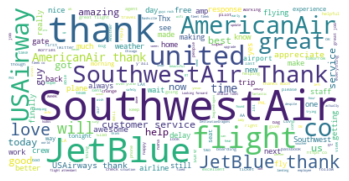

In [4]:
# Import the word cloud function 
from wordcloud import WordCloud

# Create and generate a word cloud image
my_cloud = WordCloud(background_color='white').generate(text_tweet)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")

# Don't forget to show the final image
plt.show()

Instructions 2/2
<ul>
<li>Define the default list of stop words and update it.</li>
<li>Specify the stop words argument in the <code>WordCloud</code> function.</li>
</ul>

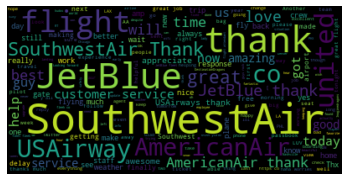

In [7]:
# Import the word cloud function and stop words list
from wordcloud import WordCloud, STOPWORDS 

# Define and update the list of stopwords
my_stop_words = STOPWORDS.update(['airline', 'airplane'])

# Create and generate a word cloud image
my_cloud = WordCloud(stopwords=my_stop_words).generate(text_tweet)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")
# Don't forget to show the final image
plt.show()

**Do you notice any changes in the first word cloud where you did not remove the stop words and the second one, where you removed them? If the change is not so obvious, perhaps the list of stop words needs to be enriched further.**

### Airline sentiment with stop words

<div class=""><p>You are given a dataset, called <code>tweets</code>, which contains customers' reviews and sentiments about airlines. It consists of two columns: <code>airline_sentiment</code> and <code>text</code> where the sentiment can be positive, negative or neutral, and the <code>text</code> is the text of the tweet.</p>
<p>In this exercise, you will create a BOW representation but will account for the stop words. Remember that stop words are not informative and you might want to remove them. That will result in a smaller vocabulary and eventually, fewer features. Keep in mind that we can enrich a default list of stop words with ones that are specific to our context.</p></div>

In [12]:
tweets_df = pd.read_csv('https://github.com/lnunesAI/Datacamp/raw/main/3-skill-tracks/sentiment-analysis-in-python/datasets/Tweets.csv', index_col=0)
tweets = tweets_df[:1000]

Instructions
<ul>
<li>Import the default list of English stop words.</li>
<li>Update the default list of stop words with the given list <code>['airline', 'airlines', '@']</code> to create <code>my_stop_words</code>. </li>
<li>Specify the stop words argument in the vectorizer.</li>
</ul>

In [14]:
# Import the stop words
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

# Define the stop words
my_stop_words = ENGLISH_STOP_WORDS.union(['airline', 'airlines', '@'])

# Build and fit the vectorizer
vect = CountVectorizer(stop_words=my_stop_words)
vect.fit(tweets.text)

# Create the bow representation
X_review = vect.transform(tweets.text)
# Create the data frame
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

   00  000  000114  000419  ...  zfqmpgxvs6  zone  zsuztnaijq  zv2pt6trk9
0   0    0       0       0  ...           0     0           0           0
1   0    0       0       0  ...           0     0           0           0
2   0    0       0       0  ...           0     0           0           0
3   0    0       0       0  ...           0     0           0           0
4   0    0       0       0  ...           0     0           0           0

[5 rows x 2866 columns]


**Did you notice that in this case the created features contain digits and other characters? Social media data can in general be quite messy...**

### Multiple text columns

<div class=""><p>In this exercise, you will continue working with the airline Twitter data. A data set <code>tweets</code> has been imported for you. </p>
<p>In some situations, you might have more than one text column in a dataset and you might want to create a numeric representation for each of the text columns. Here, besides the <code>text</code> column, which contains the body of the tweet, there is a second text column, called <code>negativereason</code>. It contains the reason the customer left a negative review. </p>
<p>Your task is to build BOW representations for both columns and specify the required stop words.</p></div>

In [27]:
tweets = tweets_df[tweets_df.negativereason.notna()][:2000]
tweets['negativereason'].isnull().sum(axis = 0)

0

Instructions
<ul>
<li>Import the vectorizer package and the default list of English stop words.</li>
<li>Update the default list of English stop words and create the <code>my_stop_words</code> set.</li>
<li>Specify the stop words argument in the first vectorizer to the updated set, and in the second vectorizer - the default set of English stop words.</li>
</ul>

In [31]:
# Import the vectorizer and default English stop words list
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

# Define the stop words
my_stop_words = ENGLISH_STOP_WORDS.union(['airline', 'airlines', '@', 'am', 'pm'])
 
# Build and fit the vectorizers
vect1 = CountVectorizer(stop_words=my_stop_words)
vect2 = CountVectorizer(stop_words=ENGLISH_STOP_WORDS) 
vect1.fit(tweets.text)
vect2.fit(tweets.negativereason) #negative_reason

# Print the last 15 features from the first, and all from second vectorizer
print(vect1.get_feature_names()[-15:])
print(vect2.get_feature_names())

['yxe', 'yyc', 'yyj', 'yyz', 'zambia', 'zcbjyo6lsn', 'zcc82u', 'zero', 'zfqmpgxvs6', 'zhxok07aqa', 'zone', 'zones', 'zrh', 'zurich', 'zv6cfpohl5']
['attendant', 'bad', 'booking', 'cancelled', 'complaints', 'customer', 'damaged', 'flight', 'issue', 'late', 'longlines', 'lost', 'luggage', 'problems', 'service', 'tell']


**We can have multiple text columns in a single dataset. In that case, we can transform each of them to numeric features separately, using different arguments in the CountVectorizer() function.**

## Capturing a token pattern

### Specify the token pattern

<div class=""><p>In this exercise, you will work with the <code>text</code> column of the <code>tweets</code> dataset. Your task is to vectorize the object column using <code>CountVectorizer</code>. You will apply different patterns of tokens in the vectorizer. Remember that by specifying the token pattern, you can filter out characters. </p>
<p>The <code>CountVectorizer</code> has been imported for you.</p></div>

In [35]:
tweets = tweets_df[:1000]

Instructions 1/2
<li>Build a vectorizer from the <code>text</code> column, specifying the pattern of tokens to be equal to <code>r'\b[^\d\W][^\d\W]'</code>.</li>

In [36]:
# Build and fit the vectorizer
vect = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]').fit(tweets.text)
vect.transform(tweets.text)
print('Length of vectorizer: ', len(vect.get_feature_names()))

Length of vectorizer:  332


Instructions 2/2
<ul>
<li>Build a vectorizer from the <code>text</code> column using the default values of the function's arguments. </li>
<li>Build a second vectorizer, specifying the pattern of tokens to be equal to <code>r'\b[^\d\W][^\d\W]'</code>.</li>
</ul>

In [37]:
# Build the first vectorizer
vect1 = CountVectorizer().fit(tweets.text)
vect1.transform(tweets.text)

# Build the second vectorizer
vect2 = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]').fit(tweets.text)
vect2.transform(tweets.text)

# Print out the length of each vectorizer
print('Length of vectorizer 1: ', len(vect1.get_feature_names()))
print('Length of vectorizer 2: ', len(vect2.get_feature_names()))

Length of vectorizer 1:  3080
Length of vectorizer 2:  332


**Did you notice how fewer features were created when we specified the token pattern? It is a nice way to limit the size of our vocabulary and make sure we only include certain tokens when we create it.**

### String operators with the Twitter data

<div class=""><p>You continue working with the <code>tweets</code> data where the <code>text</code> column stores the content of each tweet. </p>
<p>Your task is to turn the <code>text</code> column into a list of tokens. Then, using string operators, remove all non-alphabetic characters from the created list of tokens.</p></div>

In [39]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Instructions
<ul>
<li>Import the word tokenizing function.</li>
<li>Create word tokens from each tweet.</li>
<li>Filter out all non-alphabetic characters from the created list, i.e. retain only letters.</li>
</ul>

In [40]:
# Import the word tokenizing package
from nltk import word_tokenize

# Tokenize the text column
word_tokens = [word_tokenize(review) for review in tweets.text]
print('Original tokens: ', word_tokens[0])

# Filter out non-letter characters
cleaned_tokens = [[word for word in item if word.isalpha()
] for item in word_tokens]
print('Cleaned tokens: ', cleaned_tokens[0])

Original tokens:  ['@', 'VirginAmerica', 'What', '@', 'dhepburn', 'said', '.']
Cleaned tokens:  ['VirginAmerica', 'What', 'dhepburn', 'said']


**Did you notice how the list of word tokens changes before and after the filtering out of non-alphabetic characters?**

### More string operators and Twitter

<div class=""><p>In this exercise, you will apply different string operators to three strings, selected from the <code>tweets</code> dataset. A <code>tweets_list</code> has been created for you.</p>
<p>You need to construct three new lists by applying different string operators:</p>
<ul>
<li>a list retaining only letters</li>
<li>a list retaining only characters </li>
<li>a list retaining only digits </li>
</ul>
<p>The required functions have been imported for you from <code>nltk</code>.</p></div>

In [42]:
tweets_list = ["@VirginAmerica it's really aggressive to blast obnoxious 'entertainment' in your guests' faces &amp; they have little recourse",
 "@VirginAmerica Hey, first time flyer next week - excited! But I'm having a hard time getting my flights added to my Elevate account. Help?",
 '@united Change made in just over 3 hours. For something that should have taken seconds online, I am not thrilled. Loved the agent, though.']

Instructions
<ul>
<li>Create a list of the tokens from <code>tweets_list</code>.</li>
<li>In the list <code>letters</code> remove all digits and other characters, i.e. keep only letters.</li>
<li>Retain alphanumeric characters but remove all other characters in <code>let_digits</code>.</li>
<li>Create <code>digits</code> by removing letters and characters and keeping only numbers.</li>
</ul>

In [43]:
# Create a list of lists, containing the tokens from list_tweets
tokens = [word_tokenize(item) for item in tweets_list]

# Remove characters and digits , i.e. retain only letters
letters = [[word for word in item if  word.isalpha()] for item in tokens]
# Remove characters, i.e. retain only letters and digits
let_digits = [[word for word in item if  word.isalnum()] for item in tokens]
# Remove letters and characters, retain only digits
digits = [[word for word in item if word.isdigit()] for item in tokens]

# Print the last item in each list
print('Last item in alphabetic list: ', letters[2])
print('Last item in list of alphanumerics: ', let_digits[2])
print('Last item in the list of digits: ', digits[2])

Last item in alphabetic list:  ['united', 'Change', 'made', 'in', 'just', 'over', 'hours', 'For', 'something', 'that', 'should', 'have', 'taken', 'seconds', 'online', 'I', 'am', 'not', 'thrilled', 'Loved', 'the', 'agent', 'though']
Last item in list of alphanumerics:  ['united', 'Change', 'made', 'in', 'just', 'over', '3', 'hours', 'For', 'something', 'that', 'should', 'have', 'taken', 'seconds', 'online', 'I', 'am', 'not', 'thrilled', 'Loved', 'the', 'agent', 'though']
Last item in the list of digits:  ['3']


## Stemming and lemmatization

### Stems and lemmas from GoT

<div class=""><p>In this exercise, you are given a couple of sentences from George R.R. Martin's <strong>Game of Thrones</strong>. Your task is to create stems and lemmas from the given <code>GoT</code> string.</p>
<p>Remember that stems reduce a word to its root whereas lemmas produce an actual word. However, speed can differ significantly between the methods with stemming being much faster. In Steps 2 and 3, pay attention to the total time it takes to perform each operation. We're making use of the <code>time.time()</code> method to measure the time it takes to perform stemming and lemmatization.</p></div>

In [44]:
GoT = 'Never forget what you are, for surely the world will not. Make it your strength. Then it can never be your weakness. Armour yourself in it, and it will never be used to hurt you.'

In [48]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

Instructions 1/3
<ul>
<li>Import the stemming and lemmatization functions.</li>
<li>Build a list of tokens from the <code>GoT</code> string.</li>
</ul>

In [45]:
# Import the required packages from nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import word_tokenize

porter = PorterStemmer()
WNlemmatizer = WordNetLemmatizer()

# Tokenize the GoT string
tokens = word_tokenize(GoT) 

Instructions 2/3
<li>Using list comprehension and the <code>porter</code> stemmer you imported, create the <code>stemmed_tokens</code> list.</li>

In [46]:
import time

# Log the start time
start_time = time.time()

# Build a stemmed list
stemmed_tokens = [porter.stem(token) for token in tokens] 

# Log the end time
end_time = time.time()

print('Time taken for stemming in seconds: ', end_time - start_time)
print('Stemmed tokens: ', stemmed_tokens) 

Time taken for stemming in seconds:  0.0009899139404296875
Stemmed tokens:  ['never', 'forget', 'what', 'you', 'are', ',', 'for', 'sure', 'the', 'world', 'will', 'not', '.', 'make', 'it', 'your', 'strength', '.', 'then', 'it', 'can', 'never', 'be', 'your', 'weak', '.', 'armour', 'yourself', 'in', 'it', ',', 'and', 'it', 'will', 'never', 'be', 'use', 'to', 'hurt', 'you', '.']


Instructions 3/3
<li>Using list comprehension and the <code>WNlemmatizer</code> you imported, create the <code>lem_tokens</code> list.</li>

In [49]:
import time

# Log the start time
start_time = time.time()

# Build a lemmatized list
lem_tokens = [WNlemmatizer.lemmatize(token) for token in tokens]

# Log the end time
end_time = time.time()

print('Time taken for lemmatizing in seconds: ', end_time - start_time)
print('Lemmatized tokens: ', lem_tokens) 

Time taken for lemmatizing in seconds:  1.690138578414917
Lemmatized tokens:  ['Never', 'forget', 'what', 'you', 'are', ',', 'for', 'surely', 'the', 'world', 'will', 'not', '.', 'Make', 'it', 'your', 'strength', '.', 'Then', 'it', 'can', 'never', 'be', 'your', 'weakness', '.', 'Armour', 'yourself', 'in', 'it', ',', 'and', 'it', 'will', 'never', 'be', 'used', 'to', 'hurt', 'you', '.']


**You can use stemming or lemmatization to transform lists of tokens. Which one to choose will depend on the problem. Did you notice how much longer lemmatization takes compared to stemming?**

### Stem Spanish reviews

<div class=""><p>You will recall that in a previous chapter we used a language detection package to determine the language of different Amazon product reviews. In this exercise, you will first detect the languages in the <code>non_english_reviews</code> and then select only those in Spanish. Feel free to go back to the video discussing foreign language detection if you have forgotten some of the concepts. </p>
<p>In the second step, you will create word tokens from the Spanish reviews and will stem them using a SnowBall stemmer for the Spanish language.</p></div>

In [ ]:
%%capture
!pip install langdetect
from tqdm.auto import tqdm
from langdetect import detect_langs

In [98]:
reviews_df = pd.read_csv('https://github.com/lnunesAI/Datacamp/raw/main/3-skill-tracks/sentiment-analysis-in-python/datasets/amazon_reviews_sample.csv', index_col=0)

In [99]:
from langdetect import detect_langs
languages = [] 
non_english_reviews = reviews_df
# Loop over the rows of the dataset and append  
for row in tqdm(range(len(non_english_reviews))):
    languages.append(detect_langs(non_english_reviews.iloc[row, 1]))

# Clean the list by splitting     
languages = [str(lang).split(':')[0][1:] for lang in languages]

# Assign the list to a new feature 
non_english_reviews['language'] = languages

non_english_reviews.head()

,score,review,language
0,1,Stuning even for the non-gamer: This sound tr...,en
1,1,The best soundtrack ever to anything.: I'm re...,en
2,1,Amazing!: This soundtrack is my favorite musi...,en
3,1,Excellent Soundtrack: I truly like this sound...,en
4,1,"Remember, Pull Your Jaw Off The Floor After H...",en


In [100]:
non_english_reviews[non_english_reviews.language != 'en'].head()

,score,review,language
169,1,Awesume! BEST BLOCKS EVER!: THIS TOY WAS OUR ...,de
1249,1,Il grande ritorno!: E' dai tempi del tour di ...,it
1259,1,La reencarnación vista por un científico: El ...,es
1260,1,Excelente Libro / Amazing book!!: Este libro ...,es
1261,1,Magnifico libro: Brian Weiss ha dejado una ma...,es


In [102]:
sum(non_english_reviews.language[non_english_reviews.language != 'en'].value_counts())

30

Instructions 1/2
<ul>
<li>Import the <code>langdetect</code> package.</li>
<li>Iterate over the rows of the <code>non_english_reviews</code> using the <code>len()</code> method and <code>range()</code> function.</li>
<li>Use <code>detect_langs()</code> to detect the language of each review in the <code>for</code> loop.</li>
</ul>

In [103]:
# Import the language detection package
import langdetect

# Loop over the rows of the dataset and append  
languages = [] 
for i in range(len(non_english_reviews)):
    languages.append(langdetect.detect_langs(non_english_reviews.iloc[i, 1]))

# Clean the list by splitting     
languages = [str(lang).split(':')[0][1:] for lang in languages]
# Assign the list to a new feature 
non_english_reviews['language'] = languages

# Select the Spanish ones
non_english_reviews = non_english_reviews[non_english_reviews.language == 'es']

Instructions 2/2
<ul>
<li>Import the <code>SnowballStemmer</code> from the respective package.</li>
<li>Create word tokens from the <code>review</code> column of the <code>non_english_reviews</code>.</li>
<li>Use the Spanish stemmer you imported to stem the created list of tokens.</li>
</ul>

In [105]:
# Import the required packages
from nltk.stem.snowball import SnowballStemmer
from nltk import word_tokenize

# Import the Spanish SnowballStemmer
SpanishStemmer = SnowballStemmer("spanish")

# Create a list of tokens
tokens = [word_tokenize(review) for review in non_english_reviews.review] 
# Stem the list of tokens
stemmed_tokens = [[SpanishStemmer.stem(word) for word in token] for token in tokens]

# Print the first item of the stemmed tokenss
print(stemmed_tokens[0])

['la', 'reencarn', 'vist', 'por', 'un', 'cientif', ':', 'el', 'prim', 'libr', 'del', 'dr.', 'weiss', 'sig', 'siend', 'un', 'gran', 'libr', 'par', 'tod', 'aquell', 'a', 'quien', 'les', 'inquiet', 'el', 'tem', 'de', 'la', 'reencarn', ',', 'asi', 'no', 'cre', 'en', 'ella', '.']


### Stems from tweets

<div class=""><p>In this exercise, you will work with an array called <code>tweets</code>. It contains the text of the airline sentiment data collected from Twitter. </p>
<p>Your task is to work with this array and transform it into a list of tokens using list comprehension. After that, iterate over the list of tokens and create a stem out of each token. Remember that list comprehensions are a one-line alternative to <strong>for</strong> loops.</p></div>

Instructions
<ul>
<li>Import the function we used to transform strings into stems. </li>
<li>Call the Porter stemmer function you just imported.</li>
<li>Using a list comprehension, create the list <code>tokens</code>. It should contain all the word tokens from the <code>tweets</code> array.</li>
<li>Iterate over the <code>tokens</code>  list and apply the stemming function to each item in the list.</li>
</ul>

In [112]:
# Import the function to perform stemming
from nltk.stem import PorterStemmer
from nltk import word_tokenize

# Call the stemmer
porter = PorterStemmer()

# Transform the array of tweets to tokens
tokens = [word_tokenize(tweet) for tweet in tweets.text]
# Stem the list of tokens
stemmed_tokens = [[porter.stem(word) for word in tweet] for tweet in tokens] 
# Print the first element of the list
print(stemmed_tokens[0])

['@', 'virginamerica', 'what', '@', 'dhepburn', 'said', '.']


**You have created your own list of tokens and turned them into stems! Are there other ways we can still improve the output of our tokenization and numerical representation from text?**

## TfIdf: More ways to transform text

### Your first TfIdf

<div class=""><p>In this exercise, you will apply the TfIdf method to the small <code>annak</code> dataset, containing the first sentence of <em>Anna Karenina</em> by Leo Tolstoy.</p>
<p>Your task will be to work with this dataset and apply the <code>TfidfVectorizer()</code> function. Recall that performing a numeric transformation of text is your first step in being able to understand the sentiment of the text. The Tfidf vectorizer is another way to construct a vocabulary from our sentiment column.</p></div>

Instructions
<ul>
<li>Import the function for building a Tfdif vectorizer from <code>sklearn.feature_extraction.text</code>.</li>
<li>Call the <code>TfidfVectorizer()</code> function and fit it on the <code>annak</code> dataset .</li>
<li>Transform the vectorizer.</li>
</ul>

In [113]:
# Import the required function
from sklearn.feature_extraction.text import TfidfVectorizer

annak = ['Happy families are all alike;', 'every unhappy family is unhappy in its own way']

# Call the vectorizer and fit it
anna_vect = TfidfVectorizer().fit(annak)

# Create the tfidf representation
anna_tfidf = anna_vect.transform(annak)

# Print the result 
print(anna_tfidf.toarray())

[[0.4472136  0.4472136  0.4472136  0.         0.4472136  0.
  0.4472136  0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.30151134 0.         0.30151134
  0.         0.30151134 0.30151134 0.30151134 0.30151134 0.60302269
  0.30151134]]


### TfIdf on Twitter airline sentiment data

<div class=""><p>You will now build features using the TfIdf method. You will continue to work with the <code>tweets</code> dataset.  </p>
<p>In this exercise, you will utilize what you have learned in previous lessons and remove stop words, use a token pattern and specify the n-grams.</p>
<p>The final output will be a DataFrame, of which the columns are created using the <code>TfidfVectorizer()</code>. Such a DataFrame can directly be passed to a supervised learning model, which is what we will tackle in the next chapter.</p></div>

Instructions
<ul>
<li>Import the required package to build a TfidfVectorizer and the <code>ENGLISH_STOP_WORDS</code>.</li>
<li>Build a TfIdf vectorizer from the <code>text</code> column of the <code>tweets</code> dataset, specifying uni- and bi-grams as a choice of n-grams, tokens which include only alphanumeric characters using the given token pattern, and the stop words corresponding to the <code>ENGLISH_STOP_WORDS</code>. </li>
<li>Transform the vectorizer, specifying the same column that you fit.</li>
<li>Specify the column names in the <code>DataFrame()</code> function.</li>
</ul>

In [114]:
# Import the required vectorizer package and stop words list
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

# Define the vectorizer and specify the arguments
my_pattern = r'\b[^\d\W][^\d\W]+\b'
vect = TfidfVectorizer(ngram_range=(1, 2), max_features=100, token_pattern=my_pattern, stop_words=ENGLISH_STOP_WORDS).fit(tweets.text)

# Transform the vectorizer
X_txt = vect.transform(tweets.text)

# Transform to a data frame and specify the column names
X=pd.DataFrame(X_txt.toarray(), columns=vect.get_feature_names())
print('Top 5 rows of the DataFrame: ', X.head())

Top 5 rows of the DataFrame:     agent  airline  airport       amp  austin  ...  wait  way  website  work  yes
0    0.0      0.0      0.0  0.000000     0.0  ...   0.0  0.0      0.0   0.0  0.0
1    0.0      0.0      0.0  0.000000     0.0  ...   0.0  0.0      0.0   0.0  0.0
2    0.0      0.0      0.0  0.000000     0.0  ...   0.0  0.0      0.0   0.0  0.0
3    0.0      0.0      0.0  0.633853     0.0  ...   0.0  0.0      0.0   0.0  0.0
4    0.0      0.0      0.0  0.000000     0.0  ...   0.0  0.0      0.0   0.0  0.0

[5 rows x 100 columns]


### Tfidf and a BOW on same data

<div class=""><p>In this exercise, you will transform the <code>review</code> column of the Amazon product <code>reviews</code> using both a bag-of-words and a tfidf transformation. </p>
<p>Build both vectorizers, specifying only the maximum number of features to be equal to <code>100</code>. Create DataFrames after the transformation and print the top 5 rows of each.</p></div>

In [116]:
reviews = reviews_df

Instructions
<ul>
<li>Import the BOW and Tfidf vectorizers.</li>
<li>Build and fit a BOW and a Tfidf vectorizer from the <code>review</code> column and limit the number of created features to 100.</li>
<li>Create DataFrames from the transformed vector representations.</li>
</ul>

In [118]:
# Import the required packages
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS, CountVectorizer

# Build a BOW and tfidf vectorizers from the review column and with max of 100 features
vect1 = CountVectorizer(max_features=100).fit(reviews.review)
vect2 = TfidfVectorizer(max_features=100).fit(reviews.review) 

# Transform the vectorizers
X1 = vect1.transform(reviews.review)
X2 = vect2.transform(reviews.review)
# Create DataFrames from the vectorizers 
X_df1 = pd.DataFrame(X1.toarray(), columns=vect1.get_feature_names())
X_df2 = pd.DataFrame(X2.toarray(), columns=vect2.get_feature_names())
print('Top 5 rows using BOW: \n', X_df1.head())
print('Top 5 rows using tfidf: \n', X_df2.head())

Top 5 rows using BOW: 
    about  after  all  also  am  an  ...  will  with  work  would  you  your
0      0      0    1     0   0   0  ...     0     1     0      2    0     1
1      0      0    0     0   0   0  ...     0     0     0      1    1     0
2      0      0    3     0   0   1  ...     0     0     1      1    2     0
3      0      0    0     0   0   0  ...     0     0     0      0    0     0
4      0      1    0     0   0   0  ...     0     0     0      0    3     1

[5 rows x 100 columns]
Top 5 rows using tfidf: 
    about     after       all  also  ...      work     would       you      your
0    0.0  0.000000  0.138970   0.0  ...  0.000000  0.306757  0.000000  0.175024
1    0.0  0.000000  0.000000   0.0  ...  0.000000  0.139101  0.106279  0.000000
2    0.0  0.000000  0.285009   0.0  ...  0.139218  0.104853  0.160223  0.000000
3    0.0  0.000000  0.000000   0.0  ...  0.000000  0.000000  0.000000  0.000000
4    0.0  0.174214  0.000000   0.0  ...  0.000000  0.000000  0.328184 

**You can now successfully transform text features into numeric ones using two different approaches. Which approach should you select? That usually depends on the context and on how well they perform when used with a machine learning model.**